# Importowane pakiety

In [1]:
import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# inne pakiety
import string
import statistics as st
import time
from scipy.optimize import curve_fit

# wyświetlanie inportowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm


from past.builtins import xrange
from math import fabs

# Wykład 3

# Perceptron jako klasyfikator

In [2]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla x2>x1 i 0 dla x1>x2
def point():
    x1=random.random()
    x2=random.random()
    if(x2>x1):
        return np.array([x1,x2,1])
    else:
        return np.array([x1,x2,0])
# nasz punkt i liczba "kontrolna" czy "klasyfikująca":, wskazująca czy x1>x2 (0) czy na odwrót (1)

# losowa próbka npo punktów 
npo=500
probka=np.array([point() for i in range(0,npo-1)])
probka

array([[0.12899001, 0.56261446, 1.        ],
       [0.12859403, 0.13197849, 1.        ],
       [0.94733137, 0.17077933, 0.        ],
       ...,
       [0.87964009, 0.46367665, 0.        ],
       [0.05560492, 0.1988636 , 1.        ],
       [0.56738152, 0.10917653, 0.        ]])

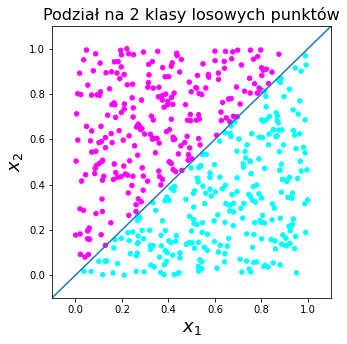

In [3]:
# linia do grafiki
def l2(w0,w1,w2):
    return [-.1,1.1],[-(w0-w1*0.1)/w2,-(w0+w1*1.1)/w2]

lin=l2(0,1,-1)
lin

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],
            s=20,cmap=mpl.cm.cool,
            norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Linia $x_2=x_1$ oddziela punkty niebieskie od różowych, w tym przypadku podział linią jest a priori możliwy w spsób dokładny. Zbiory punktów, dla których jest to możliwe, nazywamy liniowo separowalne.

## Uczenie nadzorowane (tutaj: klasyfikacja danych)

In [4]:
# początkowe wagi są dowolne, tutaj bierzemy losowe z przedziału [-0.5, 0.5]
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

# funkcja aktywacji = dobrze znana funkcja schodkowa
def f(s):
     if s > 0:
        return 1
     else:
        return 0

## Algorytm propagacji wstecznej (najprostsza postać dla pojedynczego neuronu MCP)

Dla danego (losowego) punktu, który jest niebieski (1) lub różowy (0), nasz perceptron (który jest jeszcze niewytrenowany) z aktualnymi losowymi wagami da pewną odpowiedź, poprawną lub błędną.

In [5]:
p=point() # losowy punkt
print(p)
odp=f(w0+w1*p[0]+w2*p[1]) # odpowiedź uzyskana
if odp==p[2]:             # jeśli odpowiedź uzyskana jest poprawna
    print("wynik ",odp, "(poprawny)")
else:
     print("wynik ",odp, "(błędny)")

[0.84812195 0.4945707  0.        ]
wynik  0 (poprawny)


In [6]:
# algorytm uczenia 

for u in range(25): # powtarzamy całość wiele (25) razy
    eps=1/(u*u+1) # istotne, by parametr uaktualniania się w jakiś sposób zmniejszał w kolejnych iteracjach
                  # tu jest dowolność, wiele przepisów zadziała
                  # dodane 1, by nie dzilić przez zero
    for ind in range(npo-1): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(10): # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedż dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    print(w0,w1,w2) # wydruk kontrolny 
    
# format:  w0              w1                w2      

0.08339283887428595 -3.2844926269234285 4.6248770959130585
0.08339283887428595 -3.9762861845405033 4.604019408386777
-0.11660716112571406 -4.266523880762608 4.399317921917603
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.01660716112571406 -4.328353742675856 4.350004561653958
-0.0166071611

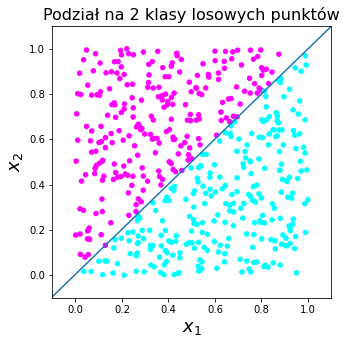

In [7]:
# odpowiadajaca im linia podziału
lin=l2(w0,w1,w2)

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [8]:
ps=point() # nowy losowy punkt 
y=f(w0+w1*ps[0]+w2*ps[1]) # funkcja aktywacji (odpowiedź uzyskana)
print('punkt:',ps,'odpowiedź uzyskana:',y) # odpowiedź uzyskana zazwyczaj, ale nie zawsze, jest dobra

# format: [ x1    x2   odpowiedź poprawna ]   odpowiedź uzyskana  

punkt: [0.7130879  0.32610875 0.        ] odpowiedź uzyskana: 0


In [9]:
# sprawdzenie, jak dobrze działa nasz klasyfikator

for j in range(1000): # test dla 1000 punktów 
    ps=point() # nowy losowy punkt 
    if(f(w0+w1*ps[0]+w2*ps[1])!=ps[2]): # jeśli funkcja aktywacji (odpowiedź uzyskana) 
                                        # jest inna od poprawnej odpowiedzi
        print(f(w0+w1*ps[0]+w2*ps[1]),int(ps[2]),ps[0],ps[1])

# format: odp. uzyskana, odp. poprawna, x1, x2

## Powtórka dla zaszumionej próbki

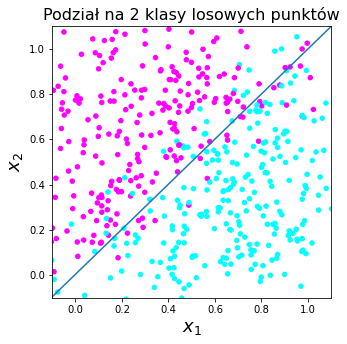

In [10]:
# resetowanie wag, bierzemy losowe z przedziału [-0.5, 0.5]
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

noi=0.4 # poziom "zaszumenia" próbki - poniżej współrzędne są losowo nieco przesuniete

# zwraca losowe współrzędne x1, x2 oraz 1 dla x2>x1 i 0 dla x1>x2
def point():
    x1=random.random()
    x2=random.random()
    if(x2>x1):
        return np.array([x1+(random.random()-.5)*noi,x2+(random.random()-.5)*noi,1])
    else:
        return np.array([x1+(random.random()-.5)*noi,x2+(random.random()-.5)*noi,0])
    
# losowa zaszumiona próbka npo punktów 
npo=500
probka=np.array([point() for i in range(npo-1)])

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widzimy, że linia nie rozdziela punktów w dokładny sposób, bo nie może z powodu "zaszumenia", które miesza obszary.

In [11]:
# algorytm uczenia

for u in range(25): # powtarzamy całość wiele (20) razy
    eps=1/(u*u+2) # istotne, by parametr uaktualniania się w jakiś sposób zmniejszał w kolejnych iteracjach
                  # tu jest dowolność, wiele przepisów zadziała
    for ind in range(npo-1): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(10): # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedż dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    print(w0,w1,w2)

0.16797389768687665 -2.107094435520565 2.4231876744946956
0.1679738976868767 -1.9321124664013276 2.258340335552621
0.16797389768687673 -1.6356873464064514 1.9372476712861106
0.07706480677778582 -1.3200157345186585 1.641509343314413
0.07706480677778588 -1.0929325036575805 1.3530993196359482
0.07706480677778588 -0.8878218861222971 1.1129129001112417
0.05074901730410167 -0.7391843327785224 0.9130305956892333
0.031141174166846752 -0.6066206332189263 0.7603918804936105
0.03114117416684674 -0.49681500995321026 0.6268530127035757
0.03114117416684673 -0.40679845357379263 0.5075373508663894
0.02133725259821926 -0.3291910884737772 0.41630863630608284
0.013207171297406249 -0.273224588459968 0.33514637881111503
0.013207171297406249 -0.2255121683831971 0.27193369804471795
0.013207171297406249 -0.18075568309666587 0.22707355460398596
0.008156666246901197 -0.14934648494762148 0.18461071718992117
0.008156666246901197 -0.12305620287109459 0.15262779695240214
0.008156666246901197 -0.09971966616111368 0.

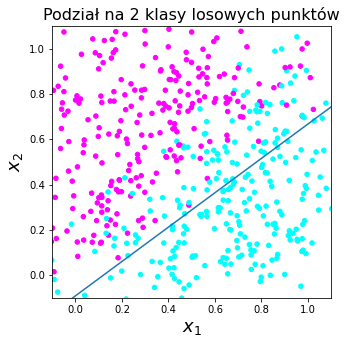

In [12]:
# odpowiadajaca im linia podziału
lin=l2(w0,w1,w2)

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widać, że podział jest optymalny, bo (dla obecnego przypadku z zaszumieniem) mniej więcej tyle samo niebieskich i różowych punktów jest błędnie sklasyfikowanych (leżą "błędnie" powyżej lub poniżej linii klasyfikującej). Oczywiście, dokładnie się tych punktów nie da rozdzielić za pomocą linii prostej.

### Można "douczyć"

Widzimy, że nasza metoda działa w przybliżony sposób i dla wielu sytuacji taki rozdział wystarcza. 

Sprawdzenie (użycie) klasyfikatora:

In [14]:
for j in range(200): # test dla 200 punktów 
    ps=point()
    if(f(w0+w1*ps[0]+w2*ps[1])!=ps[2]):
        print(f(w0+w1*ps[0]+w2*ps[1]),int(ps[2]),ps[0],ps[1])

1 0 0.8597593690966098 0.6891983219369056
1 0 0.6949477942679113 0.5966914621375525
1 0 0.5015392411874345 0.8124558861056917
1 0 0.25234797872409265 0.15516173637567754
1 0 0.2002209913820318 0.20530678525621485
1 0 0.4903993161838477 0.3370459399408142
1 0 0.6626398129557147 0.5793479974789189
1 0 0.10867418271779927 0.25161628140474035
1 0 0.6923748764583217 0.4923955505398059
1 0 0.47887813666981194 0.49439401694661234
1 0 0.7010445296791198 0.4643373364840796
1 0 0.6451060851089374 0.7864719448419021
1 0 0.6600951955994728 0.5901252237486452
1 0 0.7294574936518783 0.6905300858352188
1 0 0.7165464405491261 0.46507221364350215
1 0 0.5637224626191731 0.38184193769566377
1 0 0.8998536140348576 0.8301870258352783
1 0 0.1282558419789822 0.10852182876148682
1 0 0.7702964883692629 0.6706121087420962
1 0 0.4974925436351413 0.3602502044888181
1 0 0.7639493765351121 0.5061236576763211
1 0 0.2871373720282472 0.27370899741772675
1 0 0.5697485577689213 0.3470812533791311
1 0 0.908925422730921 0

 
 
 Jak podaje L. Breiman, gdy klasyfikator jest dobry, pojedynczy klasyfikator może być daleki od optymalnego, natomiast kombinacje wielu dają klasyfikator bliski optymalnemu i stabilny. Niestety w przypadku słabych klasyfikatorów w wyniku kombinacji można otrzymać klasyfikator gorszy. 

 Jednak w naszym przypadku widzimy, że pewna liczba punktów (kilka na 200, procentowo więcej niż bez zaszumienia) jest "przekłamanych". 

Sprawdzenie (użycie) klasyfikatora dało nam  wyjątkową okazję do zidentyfikowania punktów w pobliżu linii rozdzielającej.

# Zadanie 1.2

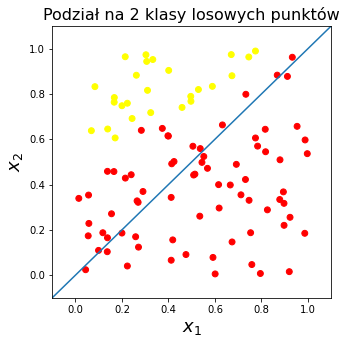

In [15]:
npo_zad=100 # próbka npo punktów 
probka_zad=np.array([[0.21411625, 0.96426023, 1.        ],
       [0.22324566, 0.75905896, 1.        ],
       [0.4117554 , 0.34329326, 0.        ],
       [0.2711907 , 0.12370197, 0.        ],
       [0.24360769, 0.69161061, 1.        ],
       [0.82557679, 0.28831672, 0.        ],
       [0.11778537, 0.18727798, 0.        ],
       [0.37364829, 0.64794825, 0.        ],
       [0.05767847, 0.22841702, 0.        ],
       [0.51382561, 0.4459305 , 0.        ],
       [0.08377459, 0.8323045 , 1.        ],
       [0.30638091, 0.94363382, 1.        ],
       [0.98635476, 0.18477572, 0.        ],
       [0.1671712 , 0.78414165, 1.        ],
       [0.54413143, 0.49782506, 0.        ],
       [0.39776042, 0.61528028, 0.        ],
       [0.95335917, 0.65703114, 0.        ],
       [0.87981245, 0.50926651, 0.        ],
       [0.67312829, 0.88043416, 1.        ],
       [0.55206559, 0.52392534, 0.        ],
       [0.42397127, 0.50171963, 0.        ],
       [0.52890739, 0.81960211, 1.        ],
       [0.26193735, 0.88260791, 1.        ],
       [0.6321066 , 0.66328535, 0.        ],
       [0.49597402, 0.78939291, 1.        ],
       [0.22327814, 0.04039445, 0.        ],
       [0.13685725, 0.10346859, 0.        ],
       [0.86794371, 0.88305935, 0.        ],
       [0.77430846, 0.60564586, 0.        ],
       [0.61566571, 0.39960006, 0.        ],
       [0.5915284 , 0.07831388, 0.        ],
       [0.81632253, 0.64406071, 0.        ],
       [0.50511946, 0.56920466, 0.        ],
       [0.16550553, 0.45745027, 0.        ],
       [0.99713275, 0.53636606, 0.        ],
       [0.01443198, 0.33898612, 0.        ],
       [0.32373937, 0.7176002 , 1.        ],
       [0.09929523, 0.10931214, 0.        ],
       [0.33271418, 0.95198756, 1.        ],
       [0.75342841, 0.18732687, 0.        ],
       [0.20004117, 0.74801575, 1.        ],
       [0.17073802, 0.60582168, 1.        ],
       [0.93276028, 0.96203644, 0.        ],
       [0.89727244, 0.21999518, 0.        ],
       [0.26505477, 0.32804044, 0.        ],
       [0.98775909, 0.59690451, 0.        ],
       [0.73123641, 0.4223595 , 0.        ],
       [0.13765982, 0.45835786, 0.        ],
       [0.58890224, 0.83358183, 1.        ],
       [0.69194158, 0.4892326 , 0.        ],
       [0.73285548, 0.79854423, 0.        ],
       [0.79537148, 0.00726942, 0.        ],
       [0.13863056, 0.64524872, 1.        ],
       [0.6180183 , 0.29632804, 0.        ],
       [0.15508292, 0.27094423, 0.        ],
       [0.23975514, 0.44338425, 0.        ],
       [0.45848827, 0.74047281, 1.        ],
       [0.92297693, 0.25545246, 0.        ],
       [0.74555793, 0.96315318, 1.        ],
       [0.41847552, 0.15568741, 0.        ],
       [0.26959336, 0.32159808, 0.        ],
       [0.29042272, 0.36942159, 0.        ],
       [0.91177321, 0.87743833, 0.        ],
       [0.25887314, 0.16953158, 0.        ],
       [0.06844735, 0.63782016, 1.        ],
       [0.77424525, 0.9895361 , 1.        ],
       [0.05633817, 0.35357194, 0.        ],
       [0.67019683, 0.97380585, 1.        ],
       [0.53481062, 0.26041486, 0.        ],
       [0.40106496, 0.90400998, 1.        ],
       [0.30992124, 0.81593767, 1.        ],
       [0.91972018, 0.01540877, 0.        ],
       [0.78343784, 0.56966247, 0.        ],
       [0.05488208, 0.17363594, 0.        ],
       [0.7586225 , 0.04681934, 0.        ],
       [0.47529445, 0.09100629, 0.        ],
       [0.04372663, 0.02394718, 0.        ],
       [0.66592134, 0.39809222, 0.        ],
       [0.13766527, 0.16501437, 0.        ],
       [0.41401435, 0.49161511, 0.        ],
       [0.53677115, 0.55888038, 0.        ],
       [0.67360044, 0.14661837, 0.        ],
       [0.30318252, 0.97307937, 1.        ],
       [0.16660573, 0.76354061, 1.        ],
       [0.71190111, 0.35465919, 0.        ],
       [0.39960201, 0.61395272, 0.        ],
       [0.50833303, 0.4420134 , 0.        ],
       [0.5678389 , 0.47170079, 0.        ],
       [0.89698516, 0.31700293, 0.        ],
       [0.28335266, 0.63933601, 0.        ],
       [0.21456851, 0.42848696, 0.        ],
       [0.41184576, 0.06591686, 0.        ],
       [0.60086703, 0.0054513 , 0.        ],
       [0.49675323, 0.76765488, 1.        ],
       [0.81782645, 0.54481398, 0.        ],
       [0.87868515, 0.33396848, 0.        ],
       [0.89431149, 0.36767782, 0.        ],
       [0.74675681, 0.33050737, 0.        ],
       [0.20001737, 0.18582118, 0.        ]])

w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

# linia do grafiki
def l2_zad(w0,w1,w2):
    return [-.1,1.1],[-(w0-w1*0.1)/w2,-(w0+w1*1.1)/w2]

lin_zad=l2_zad(0,1,-1)
lin_zad

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka_zad[:,0],probka_zad[:,1],c=probka_zad[:,2],
            # s=20,cmap=mpl.cm.cool,
            s=35,cmap = plt.cm.get_cmap("autumn"),
            norm=mpl.colors.Normalize(vmin=0, vmax=.9))
            
plt.plot(lin_zad[0],lin_zad[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widzimy, że linia nie rozdziela punktów w dokładny sposób, bo nie może z powodu "zaszumenia", które miesza obszary.

In [16]:
# funkcja aktywacji = dobrze znana funkcja schodkowa
def f(s):
     if s > 0:
        return 1
     else:
        return 0

# algorytm uczenia

for u in range(20): # powtarzamy całość wiele (20) razy
    eps=1/(u*u+2) # istotne, by parametr uaktualniania się w jakiś sposób zmniejszał w kolejnych iteracjach
                  # tu jest dowolność, wiele przepisów zadziała
    for ind_zad in range(npo_zad-1): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(10): # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka_zad[ind_zad,0]+w2*probka_zad[ind_zad,1]) # odpowiedż dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka_zad[ind_zad,2]-y)*1
            w1=w1+eps*(probka_zad[ind_zad,2]-y)*probka_zad[ind_zad,0]
            w2=w2+eps*(probka_zad[ind_zad,2]-y)*probka_zad[ind_zad,1]
    print(w0,w1,w2)

-0.46047611057713256 -0.5305088504875494 1.1673324716667763
-0.4604761105771326 -0.8056089238208827 1.3040067383334426
-0.46047611057713267 -0.8681392254875495 1.3151552416667758
-0.5513852014862236 -0.8365596763966404 1.306369288030412
-0.5513852014862236 -0.8247040891744182 1.3134981141415232
-0.5513852014862237 -0.8168003643596033 1.318250664882264
-0.5777009909599079 -0.8186412088332875 1.3048028454085798
-0.5777009909599079 -0.8144568839313268 1.3073189016830897
-0.5777009909599079 -0.8079901999919327 1.31120735228915
-0.5897491837309923 -0.8088329962569928 1.305050519277102
-0.5897491837309923 -0.8046486713550322 1.3075665755516115
-0.5978792650318053 -0.8052173875338939 1.3034119646573026
-0.5978792650318053 -0.8025561808215652 1.3049835788353847
-0.5978792650318054 -0.8000602677221501 1.306484384332461
-0.6029297700823105 -0.8004135611059884 1.3039034896859962
-0.6029297700823105 -0.7987019479782351 1.3049143076155116
-0.6029297700823105 -0.7971959937921885 1.3058036706775273
-

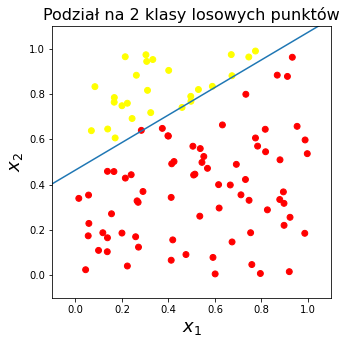

In [17]:
# odpowiadajaca im linia podziału
lin_zad=l2_zad(w0,w1,w2)

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka_zad[:,0],probka_zad[:,1],c=probka_zad[:,2],
            # s=20,cmap=mpl.cm.cool,
            s=35,cmap = plt.cm.get_cmap("autumn"),
            norm=mpl.colors.Normalize(vmin=0, vmax=.9))
            
plt.plot(lin_zad[0],lin_zad[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widać, że podział jest optymalny, bo (dla obecnego przypadku z zaszumieniem) mniej więcej tyle samo czerwonych i żółtych punktów jest błędnie sklasyfikowanych (leżą "błędnie" powyżej lub poniżej linii klasyfikującej). Oczywiście, dokładnie się tych punktów nie da rozdzielić za pomocą linii prostej.

# Można "douczyć"

In [18]:
def point_zad():
    for i in probka_zad:
        return i

ps_zad=point_zad() # nowy losowy punkt 
y=f(w0+w1*ps_zad[0]+w2*ps_zad[1]) # funkcja aktywacji (odpowiedź uzyskana)
print('punkt:',ps_zad,'odpowiedź uzyskana:',y) # odpowiedź uzyskana zazwyczaj, ale nie zawsze, jest dobra

# format: [ x1    x2   odpowiedź poprawna ]   odpowiedź uzyskana  

punkt: [0.21411625 0.96426023 1.        ] odpowiedź uzyskana: 1


In [19]:
for j in range(100): # test dla 100 punktów 
    ps_zad=point_zad()
    if(f(w0+w1*ps_zad[0]+w2*ps_zad[1])!=ps_zad[2]):
        print(f(w0+w1*ps_zad[0]+w2*ps_zad[1]),int(ps_zad[2]),ps_zad[0],ps_zad[1])
    else:
        print('Mała liczba danych treningowych = Brak pewnej liczby punktów "przekłamanych"')
        break        

Mała liczba danych treningowych = Brak pewnej liczby punktów "przekłamanych"


# Wady i zalety sieci

# Zalety:

1. Konstruktywistyczny algorytm uczenia. Chociaż opisany tu algorytm wydawać się może początkowo skomplikowany i trudny w użyciu w rzeczywistości wykonuje się niemal automatycznie, nie wymagając ingerencji użytkownika w proces uczenia się lub wybierania architektury.
2. Możliwość zastosowania różnych separowalnych funkcji transferu, również nieróżniczkowalnych
3. Możliwość wyciąganie reguł logicznych, które w wielu przypadkach dorównują algorytmom specjalizowanym do tego celu
4. Możliwość pracy z wartościami brakującymi oraz ich uzupełniania.

# Wady:

1. Brak stabilności w sensie określonym przez Breimana szczególnie dla problemów zawierających małą liczby danych treningowych. Poprawę stabilności w sieci można uzyskać poprzez zastosowanie komitetu sieci. Jak pokazują rezultaty metoda ta dla sieci działa bardzo dobrze.
2. Algorytm uczenia jest algorytmem ad-hoc. 

# Literatura: 

Rafał Adamczak "Zastosowanie sieci neuronowych do klasyfikacji danych doświadczalnych"

# Wykład 4

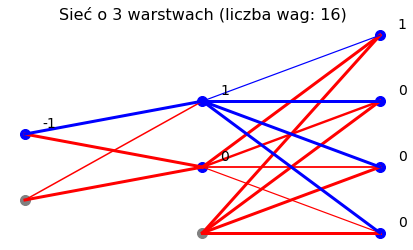

In [20]:
# funkcja aktywacji = dobrze znana funkcja schodkowa
def f(s):
     if s > 0:
        return 1
     else:
        return 0
    
def rys_siec(n_war):
    plt.figure(figsize=(10,5)) # rozmiar rysunku
    
    li_war=len(n_war)
    
    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war): # pętla po warstwach
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
               
    for i in range(li_war-1): # pętla po warstwach z wyjątkim ostatniej
        for j in range(n_war[i]): # pętla po węzłach, z których wychodzi krawędź
            for k in range(n_war[i+1]-1):  # pętla po węzłach z kolejnej wartwy, do których wchodzi krawędź
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray') # rysowanie krawędzi
                # współrzędne odpowiadają współrzędnym punktu
       
    plt.axis("off")
    plt.show()

    
def plot_net(n_war):
    """Narysuj szkielet sieci"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    for i in range(li_war-1): # pętla po warstwach z wyjątkim ostatniej
        for j in range(n_war[i]): # pętla po węzłach, z których wychodzi krawędź
            for k in range(n_war[i+1]-1):  # pętla po węzłach z kolejnej wartwy, do których wchodzi krawędź
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray') # rysowanie krawędzi
                # współrzędne odpowiadają współrzędnym punktu

    plt.title("Sieć o " + str(li_war)+" warstwach",fontsize=16)

    plt.axis("off")
    plt.show()
    
    
def plot_net_w(n_war, wagi):
    """Narysuj sieć z wagami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)
                

    plt.title("Sieć o "+str(li_war)+" warstwach (liczba wag: "+str(li_par)+")",fontsize=16)

    plt.axis("off")
    plt.show()
    
    
def feed_forward(n_war, wagi, x_in):
    """Propagacja sygnału w przód"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    x.update({0: np.array(x_in)}) 
    
    for i in range(1,li_war): # pętla po warstwach począwszy od pierwszej po inpucie
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[f(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy (określony prze funkcję f)
        x.update({i: np.insert(b,0,1)}) # dopisanie do słownika po wstawieniu sygnału 1 dla węzła progowego
        
    return x


def plot_net_w_x(n_war, wagi, x):
    """Narysuj sieć z wagami i sygnałami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
            lab=x[i][j]
            plt.text(i+0.1, j-n_war[i]/2+0.1, lab, fontsize=14)
    
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)

    plt.title("Sieć o "+str(li_war)+" warstwach (liczba wag: "+str(li_par)+")",fontsize=16)

    plt.axis("off")
    plt.show()
    
n_war=[2,3,5] # liczby węzłów w warstwach
wagi={1:[[1,.5],[1,-1]],2:[[1,1,1,1],[.4,.6,.8,1],[-1,-1,-1,-.4]]} # słownik macierzy wag
x_in=[1,-1] # input (pierwszy element ma być 1 - próg)

x=feed_forward(n_war,wagi,x_in) # propagacja sygnału do przodu

plot_net_w_x(n_war, wagi, x) # rysunek

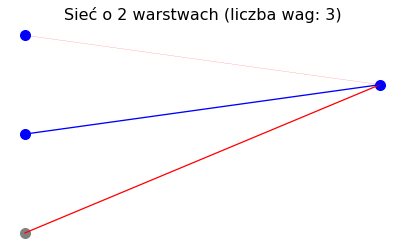

In [21]:
# bierzemy na początek losowe wagi z przedziału [-0.5, 0.5]
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

plot_net_w([3,2],{1: [[w0],[w1],[w2]]}) # zwróć uwagę na nawiasy klamrowe

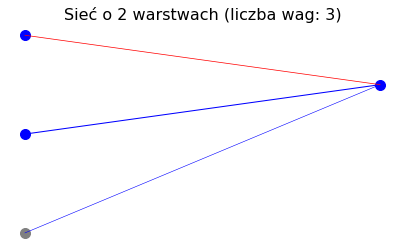

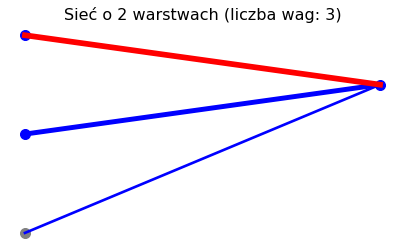

[[-0.885479114921629], [-1.6410043026769259], [1.9024565448240507]]


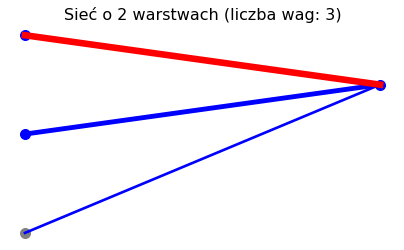

[[-0.8854791149216289], [-1.6141976101769258], [2.1989863518240504]]


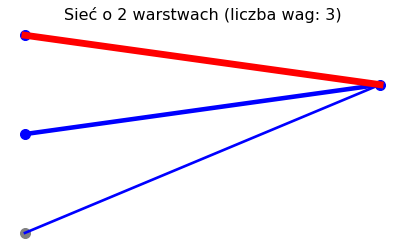

[[-0.8854791149216289], [-1.5132543439769257], [2.2761687382240505]]


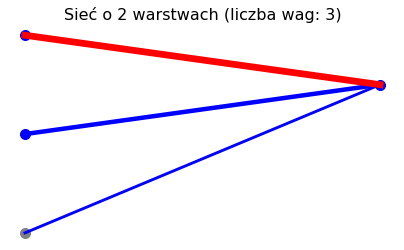

[[-0.955479114921629], [-1.497187390276926], [2.2566715521240504]]


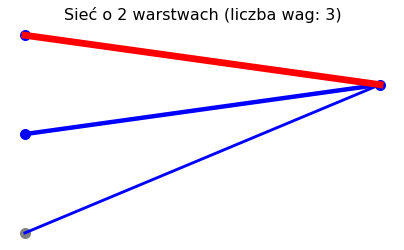

[[-0.9554791149216291], [-1.4796132256886902], [2.2672389884769917]]


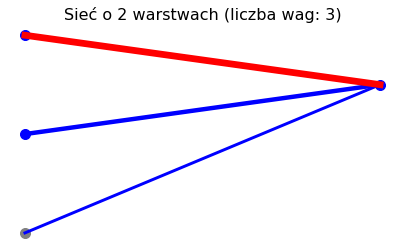

[[-0.982402191844706], [-1.4814965511886902], [2.2534808347077604]]


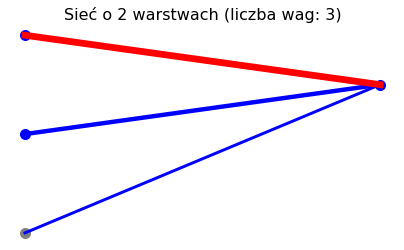

[[-0.9824021918447059], [-1.4734219350265279], [2.2583361433023548]]


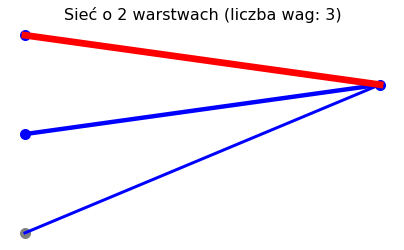

[[-0.9964021918447059], [-1.4714136563065279], [2.2529783675223545]]


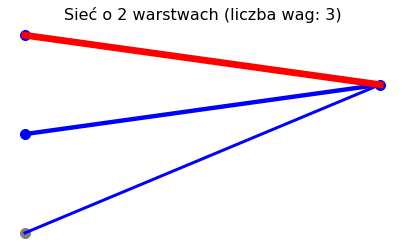

[[-0.996402191844706], [-1.4626197526296052], [2.258338600183893]]


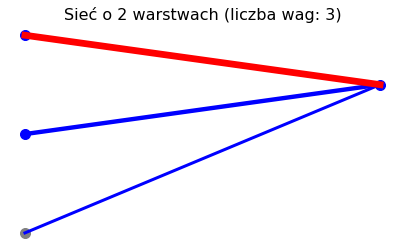

[[-1.0049387772105596], [-1.461395192434483], [2.2550716637326738]]


In [22]:
# Algorytm uczenia nadzorowanego dla pojedynczego perceptronu, wytłumaczony w poprzednim wykładzie

def teach_perceptron(probka, eps, w_in):
    [[w0],[w1],[w2]]=w_in # początkowe wagi
    for ind in range(len(probka)): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(0,9):       # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedź dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    return [[w0],[w1],[w2]]

npo_zad2=100
probka_zad2=np.array([[0.21411625, 0.96426023, 1.        ],
       [0.22324566, 0.75905896, 1.        ],
       [0.4117554 , 0.34329326, 0.        ],
       [0.2711907 , 0.12370197, 0.        ],
       [0.24360769, 0.69161061, 1.        ],
       [0.82557679, 0.28831672, 0.        ],
       [0.11778537, 0.18727798, 0.        ],
       [0.37364829, 0.64794825, 0.        ],
       [0.05767847, 0.22841702, 0.        ],
       [0.51382561, 0.4459305 , 0.        ],
       [0.08377459, 0.8323045 , 1.        ],
       [0.30638091, 0.94363382, 1.        ],
       [0.98635476, 0.18477572, 0.        ],
       [0.1671712 , 0.78414165, 1.        ],
       [0.54413143, 0.49782506, 0.        ],
       [0.39776042, 0.61528028, 0.        ],
       [0.95335917, 0.65703114, 0.        ],
       [0.87981245, 0.50926651, 0.        ],
       [0.67312829, 0.88043416, 1.        ],
       [0.55206559, 0.52392534, 0.        ],
       [0.42397127, 0.50171963, 0.        ],
       [0.52890739, 0.81960211, 1.        ],
       [0.26193735, 0.88260791, 1.        ],
       [0.6321066 , 0.66328535, 0.        ],
       [0.49597402, 0.78939291, 1.        ],
       [0.22327814, 0.04039445, 0.        ],
       [0.13685725, 0.10346859, 0.        ],
       [0.86794371, 0.88305935, 0.        ],
       [0.77430846, 0.60564586, 0.        ],
       [0.61566571, 0.39960006, 0.        ],
       [0.5915284 , 0.07831388, 0.        ],
       [0.81632253, 0.64406071, 0.        ],
       [0.50511946, 0.56920466, 0.        ],
       [0.16550553, 0.45745027, 0.        ],
       [0.99713275, 0.53636606, 0.        ],
       [0.01443198, 0.33898612, 0.        ],
       [0.32373937, 0.7176002 , 1.        ],
       [0.09929523, 0.10931214, 0.        ],
       [0.33271418, 0.95198756, 1.        ],
       [0.75342841, 0.18732687, 0.        ],
       [0.20004117, 0.74801575, 1.        ],
       [0.17073802, 0.60582168, 1.        ],
       [0.93276028, 0.96203644, 0.        ],
       [0.89727244, 0.21999518, 0.        ],
       [0.26505477, 0.32804044, 0.        ],
       [0.98775909, 0.59690451, 0.        ],
       [0.73123641, 0.4223595 , 0.        ],
       [0.13765982, 0.45835786, 0.        ],
       [0.58890224, 0.83358183, 1.        ],
       [0.69194158, 0.4892326 , 0.        ],
       [0.73285548, 0.79854423, 0.        ],
       [0.79537148, 0.00726942, 0.        ],
       [0.13863056, 0.64524872, 1.        ],
       [0.6180183 , 0.29632804, 0.        ],
       [0.15508292, 0.27094423, 0.        ],
       [0.23975514, 0.44338425, 0.        ],
       [0.45848827, 0.74047281, 1.        ],
       [0.92297693, 0.25545246, 0.        ],
       [0.74555793, 0.96315318, 1.        ],
       [0.41847552, 0.15568741, 0.        ],
       [0.26959336, 0.32159808, 0.        ],
       [0.29042272, 0.36942159, 0.        ],
       [0.91177321, 0.87743833, 0.        ],
       [0.25887314, 0.16953158, 0.        ],
       [0.06844735, 0.63782016, 1.        ],
       [0.77424525, 0.9895361 , 1.        ],
       [0.05633817, 0.35357194, 0.        ],
       [0.67019683, 0.97380585, 1.        ],
       [0.53481062, 0.26041486, 0.        ],
       [0.40106496, 0.90400998, 1.        ],
       [0.30992124, 0.81593767, 1.        ],
       [0.91972018, 0.01540877, 0.        ],
       [0.78343784, 0.56966247, 0.        ],
       [0.05488208, 0.17363594, 0.        ],
       [0.7586225 , 0.04681934, 0.        ],
       [0.47529445, 0.09100629, 0.        ],
       [0.04372663, 0.02394718, 0.        ],
       [0.66592134, 0.39809222, 0.        ],
       [0.13766527, 0.16501437, 0.        ],
       [0.41401435, 0.49161511, 0.        ],
       [0.53677115, 0.55888038, 0.        ],
       [0.67360044, 0.14661837, 0.        ],
       [0.30318252, 0.97307937, 1.        ],
       [0.16660573, 0.76354061, 1.        ],
       [0.71190111, 0.35465919, 0.        ],
       [0.39960201, 0.61395272, 0.        ],
       [0.50833303, 0.4420134 , 0.        ],
       [0.5678389 , 0.47170079, 0.        ],
       [0.89698516, 0.31700293, 0.        ],
       [0.28335266, 0.63933601, 0.        ],
       [0.21456851, 0.42848696, 0.        ],
       [0.41184576, 0.06591686, 0.        ],
       [0.60086703, 0.0054513 , 0.        ],
       [0.49675323, 0.76765488, 1.        ],
       [0.81782645, 0.54481398, 0.        ],
       [0.87868515, 0.33396848, 0.        ],
       [0.89431149, 0.36767782, 0.        ],
       [0.74675681, 0.33050737, 0.        ],
       [0.20001737, 0.18582118, 0.        ]])

wagi=[[random.random()-0.5], [random.random()-0.5], [random.random()-0.5]] # inicjalizacja (losowych) wag

plot_net_w([3,2],{1: wagi}) # rysunek początkowej sieci
 
for r in range(10): # powtórz 10 razy
    wagi=teach_perceptron(probka_zad2,.7/(r*r+1),wagi) # za każdą rundą uczenie jest wolniejsze, 0.7/(r*r+1)
    plot_net_w([3,2],{1: wagi}) # wydruk aktualnych wag
    print(wagi)                 # rysunek zaktualizowanej sieci

# Zadanie 2.1

-0.584177414286994 -1.2227031306547749 1.4623426753732214
-0.584177414286994 -1.1112153739881083 1.6239519053732212
-0.584177414286994 -1.020271920654775 1.7413266070398874
-0.6750865051960849 -1.038874262472957 1.703544963403524
-0.7306420607516405 -1.047776913584068 1.6746766645146351
-0.7306420607516406 -1.0398731887692532 1.679429215255376
-0.7569578502253248 -1.0417140332429373 1.6659813957816918
-0.7569578502253248 -1.0340956767723493 1.6704805265660057
-0.7569578502253248 -1.0308623348026524 1.6724247518690358
-0.7569578502253248 -1.0257201523930137 1.6755167728328915
-0.7667617717939522 -1.0264059571969353 1.670506800872107
-0.7667617717939522 -1.0232471264652279 1.6723722941241395
-0.7667617717939522 -1.0203238309857758 1.6741300868638653
-0.7726097250103265 -1.0207329075354834 1.67114168253638
-0.7726097250103265 -1.0187706035960895 1.672300549556582
-0.7726097250103265 -1.0161188998515962 1.673876648851736
-0.7764856940025746 -1.0163900319833792 1.6718959622625889
-0.7764856

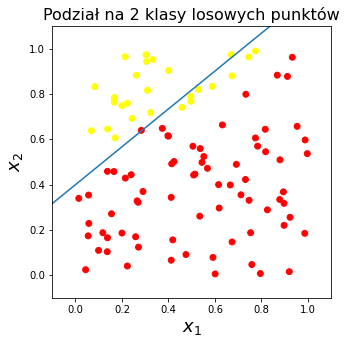

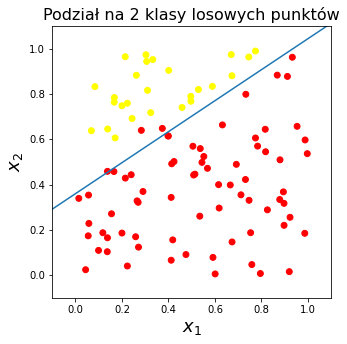

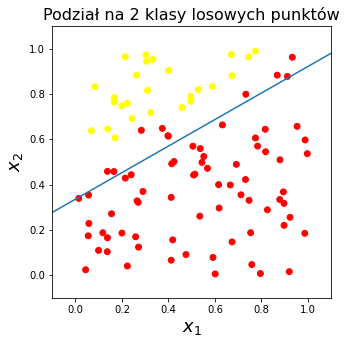

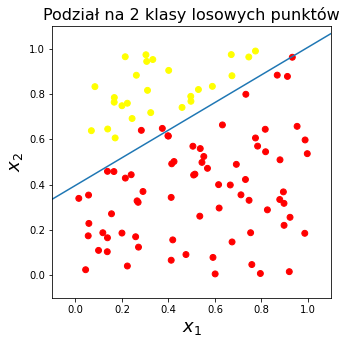

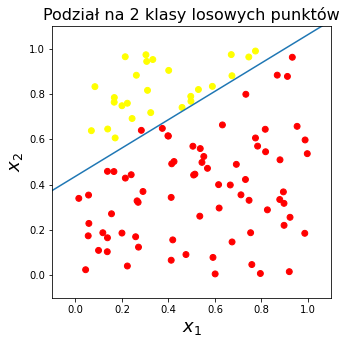

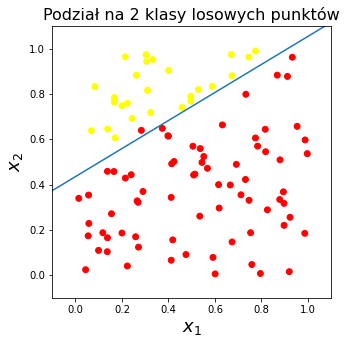

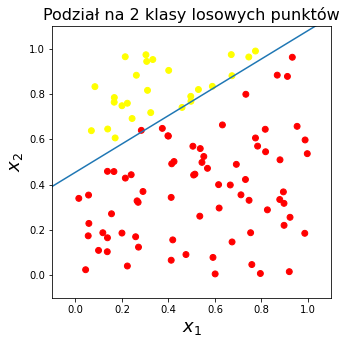

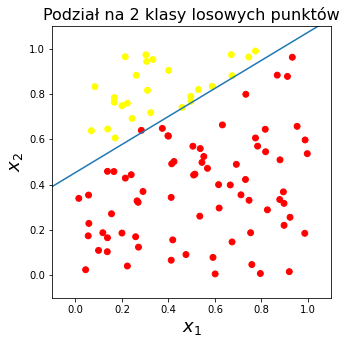

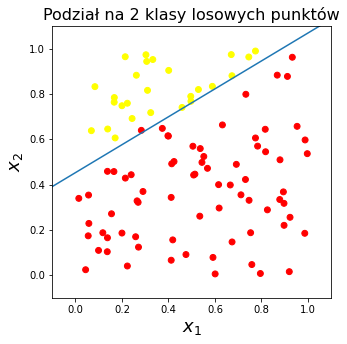

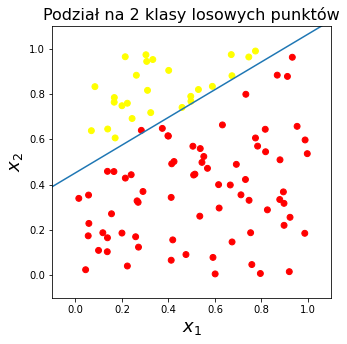

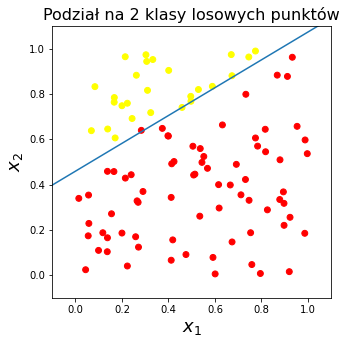

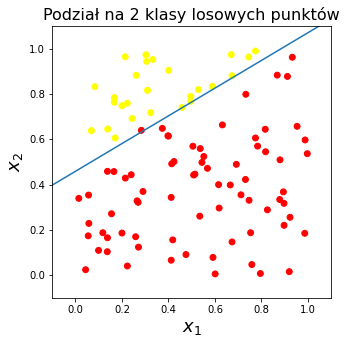

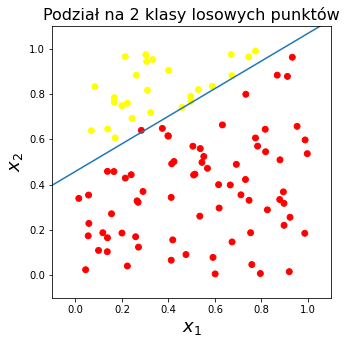

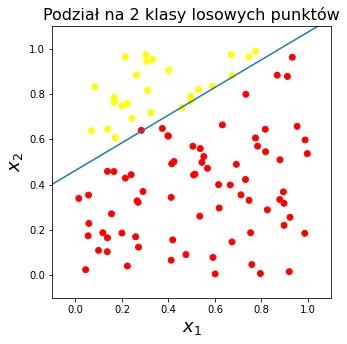

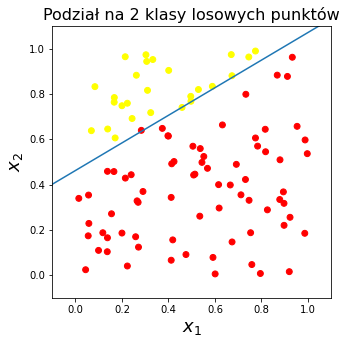

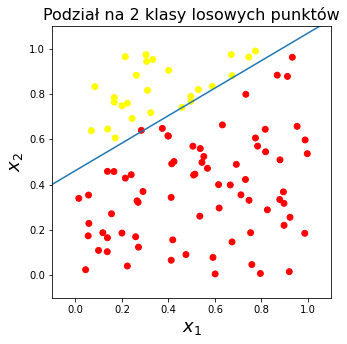

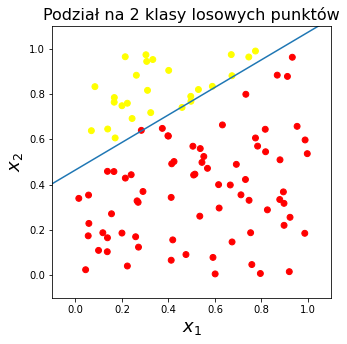

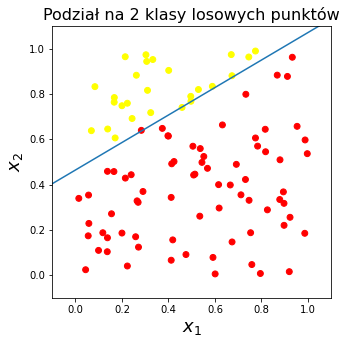

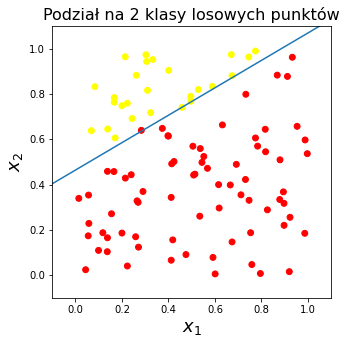

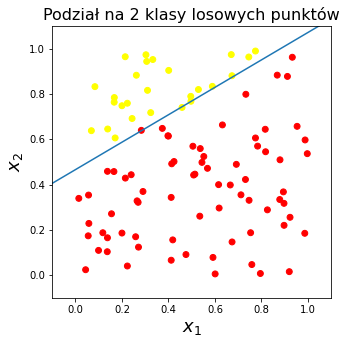

In [23]:
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

# linia do grafiki
def l2_zad2(w0,w1,w2):
    return [-.1,1.1],[-(w0-w1*0.1)/w2,-(w0+w1*1.1)/w2]

# algorytm uczenia

for u2 in range(20): # powtarzamy całość wiele (20) razy
    eps=1/(u2*u2+2) # istotne, by parametr uaktualniania się w jakiś sposób zmniejszał w kolejnych iteracjach
                  # tu jest dowolność, wiele przepisów zadziała
    for ind_zad2 in range(npo_zad2-1): # pętla po punktach z próbki, ind jest numerem punktu
        for k2 in range(10): # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka_zad2[ind_zad2,0]+w2*probka_zad2[ind_zad2,1]) # odpowiedż dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka_zad2[ind_zad2,2]-y)*1
            w1=w1+eps*(probka_zad2[ind_zad2,2]-y)*probka_zad2[ind_zad2,0]
            w2=w2+eps*(probka_zad2[ind_zad2,2]-y)*probka_zad2[ind_zad2,1]
    
    lin_zad2=l2_zad2(w0,w1,w2)       
    plt.figure(figsize=(5,5))
    plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
    plt.xlim(-.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(probka_zad2[:,0],probka_zad2[:,1],c=probka_zad2[:,2],
                # s=20,cmap=mpl.cm.cool,
                s=35,cmap = plt.cm.get_cmap("autumn"),
                norm=mpl.colors.Normalize(vmin=0, vmax=.9))
            
    plt.plot(lin_zad2[0],lin_zad2[1])

    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18);
            
            
            
    print(w0,w1,w2)

# Zadanie 2.2 

In [24]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla x2>x1 i 0 dla x1>x2
def point_22(a):
    x1=random.random()
    
    if x1 > a:
        return np.array([x1, 1])
    else:
        return np.array([x1, 0])   
    
# nasz punkt i liczba "kontrolna" czy "klasyfikująca":, wskazująca czy x1>x2 (0) czy na odwrót (1)
a = 0.5   #   Niech   a = 0.5
point_22(a)

# format:  x1          x2       l. kontrolna 

array([0.32203287, 0.        ])

In [25]:
# losowa próbka npo punktów 
npo_22=30
probka_22=np.array([point_22(0.5) for i in range(0,npo_22-1)])
probka_22

array([[0.78047459, 1.        ],
       [0.149384  , 0.        ],
       [0.74053283, 1.        ],
       [0.07419696, 0.        ],
       [0.83833923, 1.        ],
       [0.77255927, 1.        ],
       [0.93395527, 1.        ],
       [0.75985285, 1.        ],
       [0.22763313, 0.        ],
       [0.03778567, 0.        ],
       [0.2355527 , 0.        ],
       [0.99658113, 1.        ],
       [0.61945243, 1.        ],
       [0.27687387, 0.        ],
       [0.33220212, 0.        ],
       [0.98136895, 1.        ],
       [0.04316729, 0.        ],
       [0.06446826, 0.        ],
       [0.18795533, 0.        ],
       [0.02519083, 0.        ],
       [0.89311877, 1.        ],
       [0.02197566, 0.        ],
       [0.09221383, 0.        ],
       [0.03686314, 0.        ],
       [0.09127638, 0.        ],
       [0.20190053, 0.        ],
       [0.32548072, 0.        ],
       [0.13725475, 0.        ],
       [0.57526762, 1.        ]])

In [26]:
# linia do grafiki
def l2_22(w0,w1):
    return [a, a],[w1*a, w0]

lin_22=l2_22(1,0)
lin_22

([0.5, 0.5], [0.0, 1])

In [27]:
coordinate_x=[]
i=0
for p in probka_22:
    coordinate_x.append(probka_22[i][0]) 
    i += 1

print(coordinate_x)

[0.7804745909759314, 0.14938399593499863, 0.7405328291815172, 0.07419696293432054, 0.8383392276998255, 0.772559274077857, 0.9339552711564444, 0.7598528508758198, 0.227633125960651, 0.03778567227312213, 0.2355526993996846, 0.996581130379291, 0.6194524333395534, 0.27687386811744086, 0.3322021194481426, 0.9813689451776244, 0.043167287243584096, 0.06446825560184666, 0.18795532695776307, 0.02519082575417453, 0.8931187677018385, 0.021975663702582304, 0.09221383192258736, 0.0368631387726599, 0.09127638418939066, 0.20190053140406772, 0.32548072160436226, 0.1372547507823395, 0.5752676186937931]


In [28]:
coordinate_y=[]
i=0
for p in probka_22:
    coordinate_y.append(probka_22[i][0]) 
    coordinate_y[i] = 0.5
    i += 1

print(coordinate_y)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


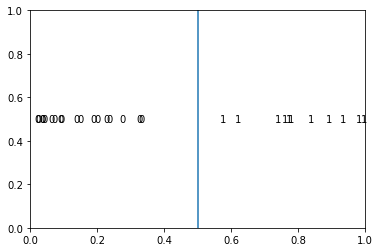

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.scatter(coordinate, coordinate_y)

#i=0
#for p in probka_22:
  #  plt.text(coordinate_x[i], coordinate_y[i], probka_22[i][1] , horizontalalignment='center', verticalalignment='center')
  #  i += 1

#def plot(dpi):
 #   fig, ax=plt.subplots(dpi=dpi)
plt.xlim(0, 1)
plt.ylim(0, 1)
i=0
for p in probka_22:
    plt.text(coordinate_x[i], coordinate_y[i], int(probka_22[i][1]) , horizontalalignment='center', verticalalignment='center')
    i += 1
        
plt.plot(lin_22[0],lin_22[1])       
#plot(225)


plt.show()

# Zadanie 2.3

Mając na uwadze techniki, które poznamy niebawem, dobrze jest użyć ciągłej funkcji aktywacji. Historycznie, używano tzw. **sigmoidu**:

$\sigma(s)=\frac{1}{1+\exp(-s)}$

Funkcja ta jest oczywiście różniczkowalna. Co więcej, 

$\sigma'(s)=\sigma(s)[1-\sigma(s)]$,

co jest jej szczególną cechą.

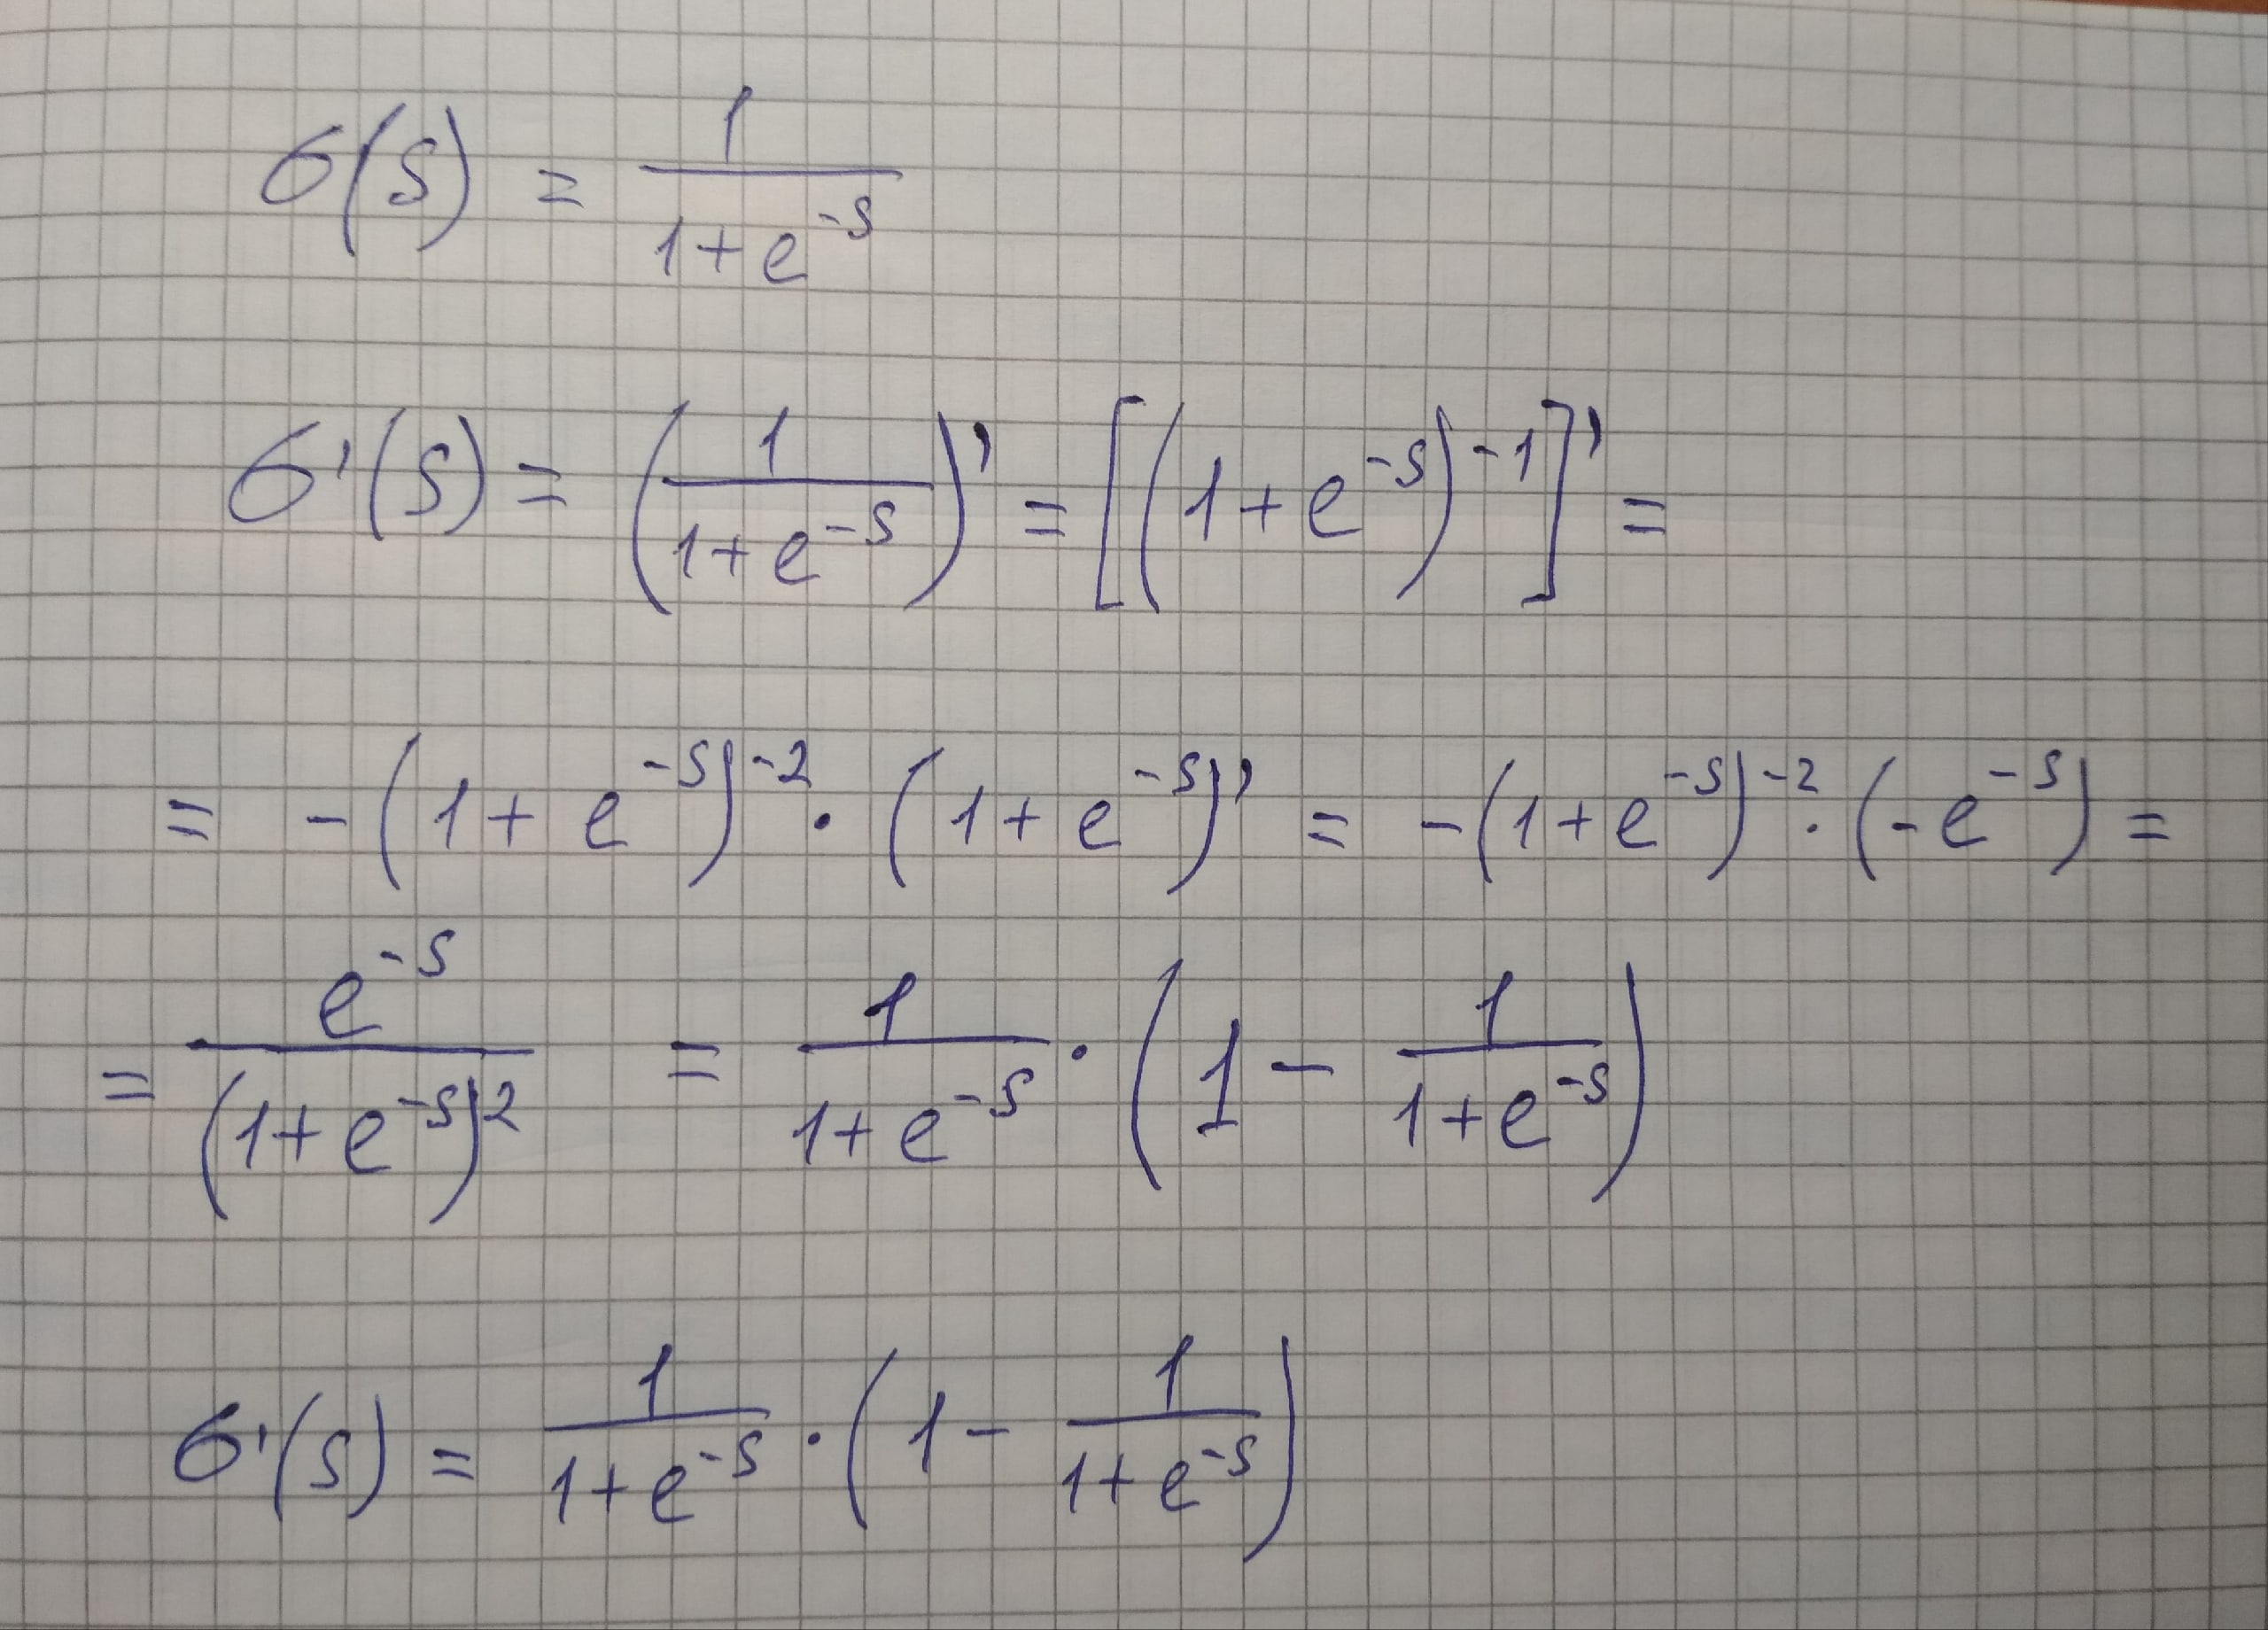

# ReLU

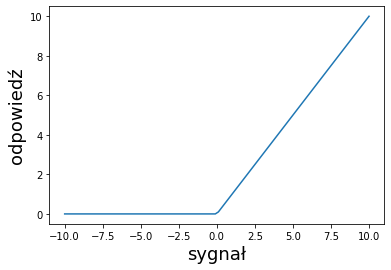

In [30]:
# ReLU, Jest to przyblizenie funkcji Softplus przez proste progowanie w zerze. 
def relu(s):
    # return m.log((1+m.exp(s)), 10) # Softplus
    return max(0, s)  # ReLU 

s = np.linspace(-10, 10, 100)
fs = [relu(z) for z in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18)

plt.plot(s, fs);

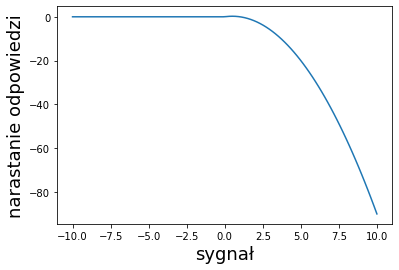

In [31]:
# pochodna ReLU
def drelu(s):
     return relu(s)*(1-relu(s)) # szczególna cecha tej funkcji
    
s = np.linspace(-10, 10, 100)
dfs = [drelu(z) for z in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('narastanie odpowiedzi',fontsize=18)

plt.plot(s, dfs);    

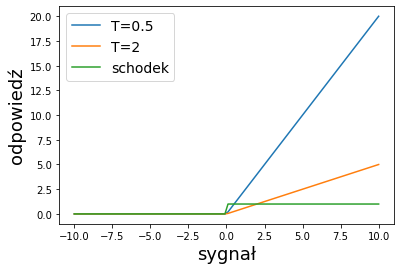

In [32]:
# ReLU z "temperaturą" T
def relu_T(s,T):
    return max(0, s/T)

s = np.linspace(-10, 10, 100)
fs = [relu_T(z,.5) for z in s]
plt.plot(s, fs)

fs = [relu_T(z,2) for z in s]
plt.plot(s, fs)

fss = [f(z) for z in s]
plt.plot(s, fss)


plt.legend(('T=0.5','T=2','schodek'),fontsize=14)

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18);

In [29]:
# sigmoid, inaczej funkcja logistyczna, a także (1+arctanh(-s/2))/2 
def sig(s):
    return 1/(1+np.exp(-s))

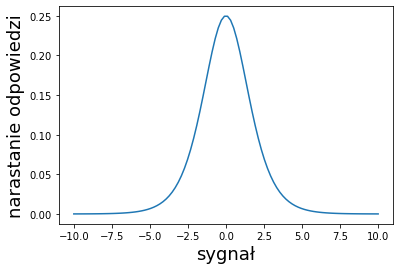

In [30]:
# pochodna sigmoidu
def dsig(s):
     return sig(s)*(1-sig(s)) # szczególna cecha tej funkcji
    
s = np.linspace(-10, 10, 100)
dfs = [dsig(z) for z in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('narastanie odpowiedzi',fontsize=18)

plt.plot(s, dfs);

In [31]:
def feed_forward(n_war, wagi, x_in):
    """Propagacja sygnału w przód"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    x.update({0: np.array(x_in)}) 
    
    for i in range(1,li_war): # pętla po warstwach począwszy od pierwszej po inpucie
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[f(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy (określony prze funkcję f)
        x.update({i: np.insert(b,0,1)}) # dopisanie do słownika po wstawieniu sygnału 1 dla węzła progowego
        
    return x

In [32]:
def punkt_tr_2():
    pu=punkt_tr()
    return [pu[0],pu[1],feed_forward(siec,wagi,[1,pu[0],pu[1]])[2][1]]

In [33]:
# skrót dla generowania liczby losowej w przedziale (-0.5,0.5)
def rn():
    return random.random()-0.5

In [34]:
# losowe wagi z przedziału (-0.5,0.5)
def ran_w(n_war):
    li_war=len(n_war) 
    wa={}
    for k in range(len(n_war)-1):
        wa.update({k+1: [[rn() for i in range(n_war[k+1]-1)] for j in range(n_war[k])]})
    return wa

# Zadanie 3

Warunek rozdzielający punkty, który jest postaci 

$w_0+w_1 x_1 +w_2 x_2>0$, 


Warunki:

$1.2-x_1-x_2>0$

$-0.2+x_1>0$

$-0.2+x_2>0$

In [35]:
def punkt_tr():
    x1=random.random()
    x2=random.random()
    if (1.2-x1-x2>0) and (-0.2+x1>0) and (-0.2+x2)>0:
        c=1
    else:
        c=0
    return np.array([x1,x2,c])

In [40]:
punkt_tr()

array([0.39468436, 0.30620752, 1.        ])

In [41]:
pr_tr=np.array([punkt_tr() for i in range(1000)])
for i in pr_tr:
    print(pr_tr)

[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...

 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0.65883439 0.52562154 1.        ]
 ...
 [0.82635694 0.97649914 0.        ]
 [0.04450383 0.09134012 0.        ]
 [0.38422473 0.867361   0.        ]]
[[0.16605522 0.73628575 0.        ]
 [0.99567544 0.62773035 0.        ]
 [0

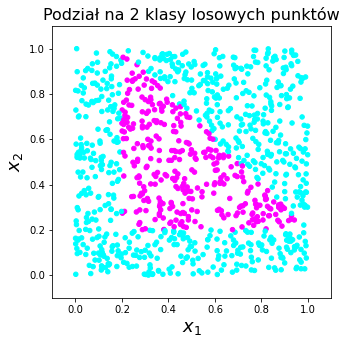

In [42]:
plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(pr_tr[:,0],pr_tr[:,1],c=pr_tr[:,2],
            s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
#plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

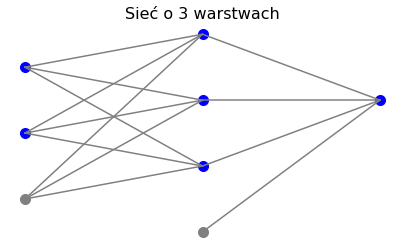

In [43]:
siec=[3,4,2]
plot_net(siec)

In [44]:
wagi={1: [[1.2, -0.2, -0.2],
  [-1, 1, 0],
  [-1, 0, 1]],
 2: [[-1],
  [0.4],
  [0.4],
  [0.4]]}

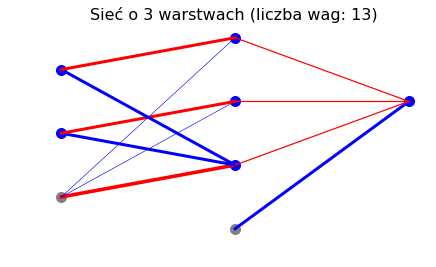

In [45]:
plot_net_w(siec,wagi)

In [46]:
pr_tr_2=np.array([punkt_tr_2() for i in range(3000)])
pr_tr_2

array([[0.92973544, 0.22014783, 1.        ],
       [0.2743529 , 0.29415369, 1.        ],
       [0.60389371, 0.14587252, 0.        ],
       ...,
       [0.28869463, 0.20932043, 1.        ],
       [0.88705839, 0.39917929, 0.        ],
       [0.31730592, 0.39601346, 1.        ]])

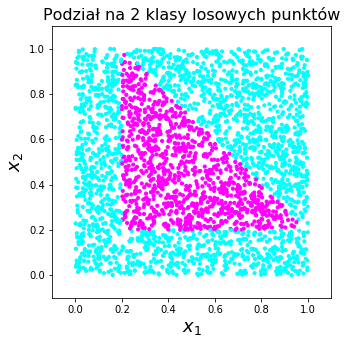

In [47]:
plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(pr_tr_2[:,0],pr_tr_2[:,1],c=pr_tr_2[:,2],
            s=10,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
#plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [48]:
siec

[3, 4, 2]

In [49]:
wagi_1=ran_w(siec)
wagi_1

{1: [[0.16478173071046887, -0.4746634200114809, -0.19802462152800515],
  [0.41230337996799704, -0.020436439370873805, -0.3285335258246327],
  [0.2490805980382813, 0.3649545142005225, 0.44655211936127914]],
 2: [[0.30321833798660724],
  [0.15733038891179596],
  [-0.08117956487293987],
  [-0.3662953633315186]]}

In [50]:
da_tr=np.delete(pr_tr,2,1)
od_tr=np.delete(np.delete(pr_tr,0,1),0,1)

In [51]:
len(pr_tr)

1000

In [30]:
def feed_forward_sig(n_war, wagi, x_in):
    """Propagacja sygnału w przód"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkich warstwach
    x.update({0: np.array(x_in)}) 
    
    for i in range(1,li_war): # pętla po warstwach począwszy od pierwszej po inpucie
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[sig(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy (określony przez funkcję aktywacji)
        x.update({i: np.insert(b,0,1)}) # dopisanie do słownika po wstawieniu sygnału 1 dla węzła progowego
        
    return x

In [31]:
def back_prop(dane, odp, p, n_war, wagi, eps):
    """Propagacja wsteczna"""

    li_war=len(n_war) # liczba warstw (licząc wszystkie)

    po=np.insert(dane[p],0,1) # dodanie do punktu danych jedynki na początku (węzeł progowy)

    x=feed_forward_sig(n_war,wagi,po) # propagacja sygnału do przodu z sigmoidem
   
    n=n_war[li_war-1]-1  # liczba neuronów w warstwie outputowej 
    
    k=len(n_war)-2       # liczba warstw pośrednich
                         # wszystkich warstw jest k+2, są numerowane jako 0,1,2,...,k+1
                         # tj. 0 - inputowa, k+1 - outputowa, pozostałe pośrednie

    D={}                 # słownik dla wielkości D z wyprowadzenia
    
    D.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(x[k+1][gam]-odp[p][gam-1])*dsig(np.dot(x[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]})   

    wagi[k+1]-=eps*np.outer(x[k],D[k+1]) # uaktualnienie wag prowadzących do warstwy outputowej
    
    # pętla po pozostałych warstwach po j = k, k-1, ..., 1
    for j in reversed(range(1,k+1)):            # pętla w odwrotnej kolejności
        u=np.delete(np.dot(wagi[j+1],D[j+1]),0) # implementacja wzoru z wyprowadzena
        v=dsig(np.dot(x[j-1],wagi[j]))          # ...
        D.update({j: [u[i]*v[i] for i in range(len(u))]}) # dopisanie D[j] do słownika
        wagi[j]-=eps*np.outer(x[j-1],D[j])      # uaktualnienie wag

In [54]:
for k in range(20):
    print(k," ",end="")
    for p in range(len(pr_tr)):
        for j in range(3):
            back_prop(da_tr, od_tr, p, siec, wagi_1, 0.5)

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  

In [55]:
wagi_1

{1: array([[4.14487048, 3.96429569, 4.03335064],
        [1.7224331 , 1.82064645, 1.65363067],
        [1.39047054, 1.6468471 , 1.70670494]]), 2: array([[-0.78384186],
        [-0.59682518],
        [-0.30774903],
        [-0.37698162]])}

In [56]:
def punkt_tr_3():
    pu=punkt_tr()
    return [pu[0],pu[1],feed_forward(siec,wagi_1,[1,pu[0],pu[1]])[2][1]]

In [57]:
# odpowiadajaca im linia podziału
lin_1=l2(-1.2,1,1)
lin_2=l2(-.2,1,0.000001)
lin_3=l2(-.2,0.000001,1)

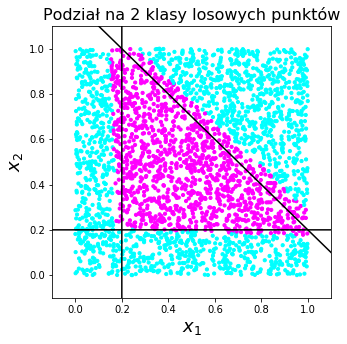

In [129]:
pr_tr_3=np.array([punkt_tr_3() for i in range(3000)])

plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(pr_tr_3[:,0],pr_tr_3[:,1],c=pr_tr_3[:,2],
            s=10,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.plot(lin_1[0],lin_1[1],color='black')
plt.plot(lin_2[0],lin_2[1],color='black')
plt.plot(lin_3[0],lin_3[1],color='black')

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

# Wykład 6

In [32]:
# losowe wagi z przedziału (-0.5s,0.5s)
def ran_w_s(n_war,s):
    li_war=len(n_war) 
    wa={}
    for k in range(len(n_war)-1):
        wa.update({k+1: [[s*rn() for i in range(n_war[k+1]-1)] for j in range(n_war[k])]})
    return wa

In [33]:
def plot_net_w_s(n_war, wagi,s):
    """Narysuj sieć z wagami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]*s
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)
                

    plt.title("Wytrenowana sieć",fontsize=16)

    plt.axis("off")
    plt.show()

In [40]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla punktów 
# w kole o środku (0.5,0.5) i promeniu 0.4, a 0 poza nim

def kolo():
    x1=random.random()
    x2=random.random()
    if((x1-0.5)*(x1-0.5)+(x2-0.5)*(x2-0.5) < 0.4*0.4): # w kole
        return np.array([x1,x2,1])
    else:                                              # poza kołem
        return np.array([x1,x2,0])

In [41]:
kolo()

array([0.55455072, 0.7991126 , 1.        ])

In [42]:
# losowa próbka szkoleniowa 3000 punktów 
probka_k=np.array([kolo() for i in range(3000)])
da_k=np.delete(probka_k,2,1)
od_k=np.delete(np.delete(probka_k,0,1),0,1)

In [43]:
od_k

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

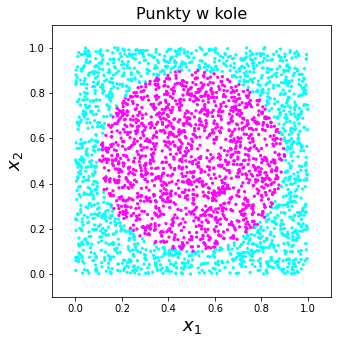

In [44]:
plt.figure(figsize=(5,5))
plt.title("Punkty w kole",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka_k[:,0],probka_k[:,1],c=probka_k[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

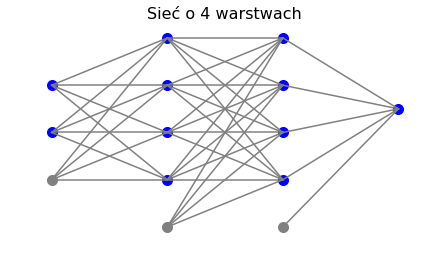

In [65]:
# sieć o dość pokaźnej liczbie neuronów
siec=[3,5,5,2]
plot_net(siec)

wagi=ran_w_s(siec,5.); # początkowe losowe wagi

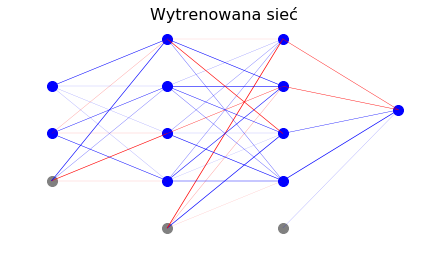

In [66]:
plot_net_w_s(siec,wagi,.1)

In [67]:
eps=1.8

In [68]:
# uczenie trwa dość długo, trzeba przepuścić kilka razy
eps=eps/8 # za każdym razem zmniejszamy eps
print('obecna szybkość uczenia: ',eps)

for k in range(50):  # 50 rund
    if k%10==9:
        print(k+1,' ',end='')
    for p in range(len(probka)):
        back_prop(da_k,od_k,p,siec,wagi,eps)

obecna szybkość uczenia:  0.225
10  20  30  40  50  

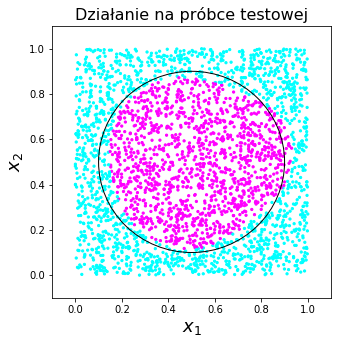

In [171]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie koła
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

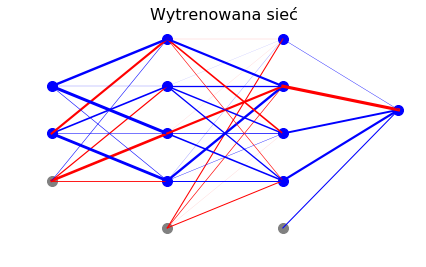

In [69]:
plot_net_w_s(siec,wagi,.1)

In [70]:
wagi[3][1][0]=0

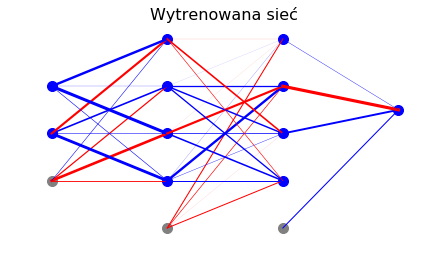

In [71]:
wagi[2][4][2]=0
plot_net_w_s(siec,wagi,.1)

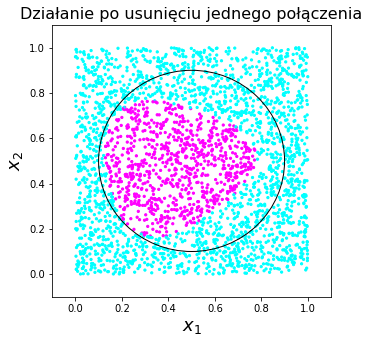

In [175]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie koła
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Działanie po usunięciu jednego połączenia",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

# Zadanie 4.1 (półkole)

In [72]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla punktów 
# w kole o środku (0.5,0.5) i promeniu 0.4, a 0 poza nim

def pkolo():
    x1=random.random()
    x2=random.random()
    if((x1-0.5)*(x1-0.5)+(x2-0.5)*(x2-0.5) < 0.4*0.4): # w kole
        if ((x1-0.5)+(x2-0.5) < 0.2*0.2) :
            return np.array([x1,x2,1])
        else:                                              # poza kołem
            return np.array([x1,x2,0])
    else:                                              # poza kołem
        return np.array([x1,x2,0])

In [73]:
# nasz punkt i liczba "kontrolna" czy "klasyfikująca":, wskazująca czy jest w okręgu czy poza
pkolo()

# format:  x1          x2       l. kontrolna 

array([0.88109197, 0.20468994, 0.        ])

In [74]:
# losowa próbka szkoleniowa 3000 punktów 
probka_k=np.array([pkolo() for i in range(3000)])
da_k=np.delete(probka_k,2,1)
od_k=np.delete(np.delete(probka_k,0,1),0,1)

In [75]:
od_k

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

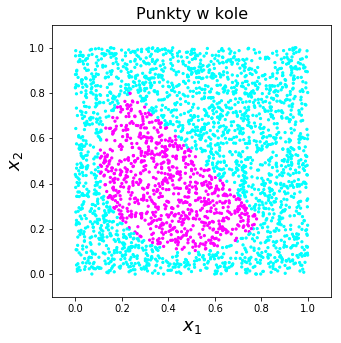

In [76]:
plt.figure(figsize=(5,5))
plt.title("Punkty w kole",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka_k[:,0],probka_k[:,1],c=probka_k[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

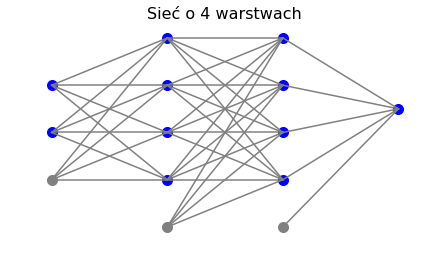

In [77]:
# sieć o dość pokaźnej liczbie neuronów
siec=[3,5,5,2]
plot_net(siec)

wagi=ran_w_s(siec,5.); # początkowe losowe wagi

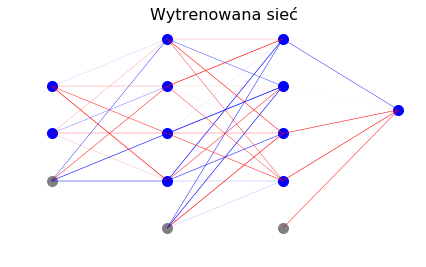

In [78]:
plot_net_w_s(siec,wagi,.1)

In [79]:
eps=1.8

In [80]:
# uczenie trwa dość długo, trzeba przepuścić kilka razy
eps=eps/4 # za każdym razem zmniejszamy eps
print('obecna szybkość uczenia: ',eps)

for k in range(50):  # 50 rund
    if k%10==9:
        print(k+1,' ',end='')
    for p in range(len(probka)):
        back_prop(da_k,od_k,p,siec,wagi,eps)

obecna szybkość uczenia:  0.45
10  20  30  40  50  

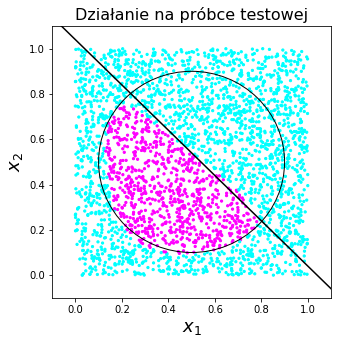

In [191]:
lin_1=l2(-1.04,1,1)

test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie koła
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.plot(lin_1[0],lin_1[1],color='black')

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

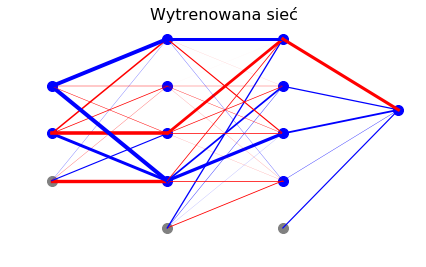

In [192]:
plot_net_w_s(siec,wagi,.1)

In [193]:
wagi[3][1][0]=0

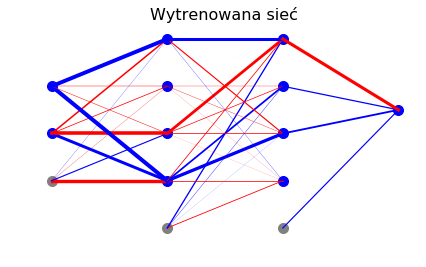

In [194]:
wagi[2][4][2]=0
plot_net_w_s(siec,wagi,.1)

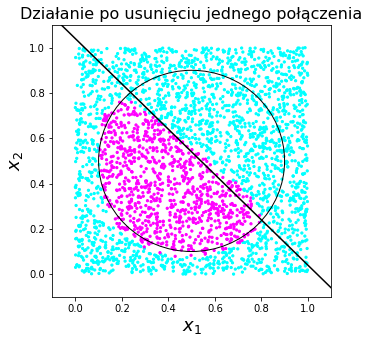

In [195]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie koła
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Działanie po usunięciu jednego połączenia",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.plot(lin_1[0],lin_1[1],color='black')

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

# Zadanie 4.2 (pierścień)

In [393]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla punktów 
# w kole o środku (0.5,0.5) i promeniu 0.4, a 0 poza nim

def pierscien():
    x1=random.random()
    x2=random.random()
    if (0.2*0.2 < (x1-0.5)*(x1-0.5)+(x2-0.5)*(x2-0.5) < 0.4*0.4):
        return np.array([x1,x2,1])
    else:                                              
        return np.array([x1,x2,0])


In [394]:
pierscien()

array([0.24674042, 0.70453109, 1.        ])

In [395]:
# losowa próbka szkoleniowa 3000 punktów 
probka_k=np.array([pierscien() for i in range(3000)])
da_k=np.delete(probka_k,2,1)
od_k=np.delete(np.delete(probka_k,0,1),0,1)

In [396]:
da_k

array([[0.34959041, 0.27159666],
       [0.55153142, 0.5942334 ],
       [0.6519982 , 0.27006527],
       ...,
       [0.11353327, 0.51168629],
       [0.71964703, 0.68996402],
       [0.26202032, 0.39250878]])

In [397]:
od_k

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

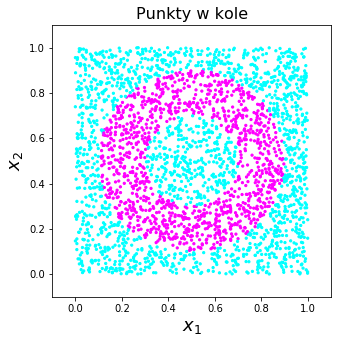

In [398]:
plt.figure(figsize=(5,5))
plt.title("Punkty w kole",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka_k[:,0],probka_k[:,1],c=probka_k[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

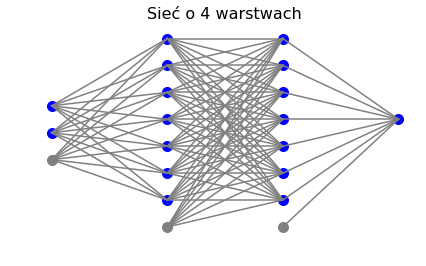

In [399]:
# sieć o dość pokaźnej liczbie neuronów
siec=[3,8,8,2]
plot_net(siec)

wagi=ran_w_s(siec,10.); # początkowe losowe wagi1

In [400]:
eps=1.8

In [401]:
# uczenie trwa dość długo, trzeba przepuścić kilka razy
eps=eps/6 # za każdym razem zmniejszamy eps
print('obecna szybkość uczenia: ',eps)

for k in range(50):  # 50 rund
    if k%10==9:
        print(k+1,' ',end='')
    for p in range(len(probka_k)):
        back_prop(da_k,od_k,p,siec,wagi,eps)

obecna szybkość uczenia:  0.3
10  20  30  40  50  

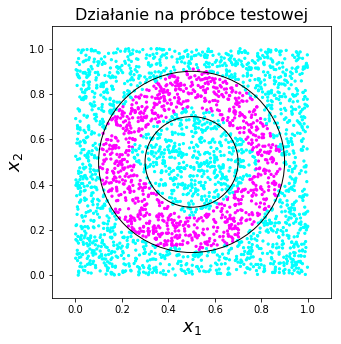

In [402]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie koła
ax=fig.add_subplot(1,1,1)
circ1=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
circ2=plt.Circle((0.5,0.5), radius=.2, color='black', fill=False)
ax.add_patch(circ1)
ax.add_patch(circ2)

plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

# Wykład 7

## Zadanie 5.1

In [73]:
def fi(x):
    return 1.2+np.cos(x) # cosinus + stała

In [74]:
# przykład 1
upx=np.pi                                 # zakres współrżednej = (0,pi)
def dane():
    x = upx*random.random()               # współrzędna x
    y = fi(x)+0.4*(random.random()-0.5)   # wartość funkcji, y=fi(x)+szum
    return [x,y]

In [75]:
dane() # losowa współrzędna x i zaszumione y

[0.6168180126908449, 1.8962488463151108]

In [76]:
tab=np.array([dane() for i in range(150)]) # 50 punktów
da_f=np.delete(tab,1,1)                   # dane inputowe, czyli x
od_f=np.delete(tab,0,1)                   # prawdziwy output, czyli y

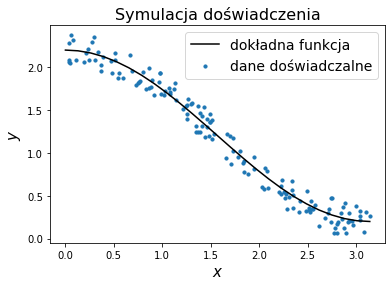

In [77]:
plt.figure(figsize=(6,4))

coo=np.linspace(0,upx,25)

exact=[fi(x) for x in coo]

plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.title("Symulacja doświadczenia",fontsize=16) 
plt.scatter(da_f,od_f,s=10,label='dane doświadczalne')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

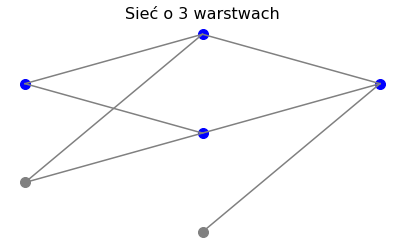

In [78]:
plot_net([2,3,2])

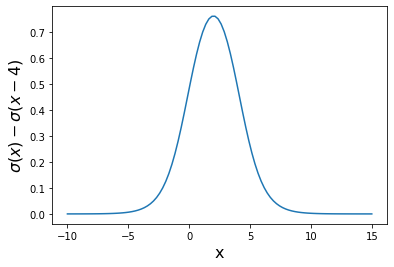

In [79]:
s = np.linspace(-10, 15, 100)

fs = [sig(z-0)-sig(z-4) for z in s]

plt.xlabel('x',fontsize=16)
plt.ylabel('$\sigma(x)-\sigma(x-4)$',fontsize=16)

plt.plot(s, fs);

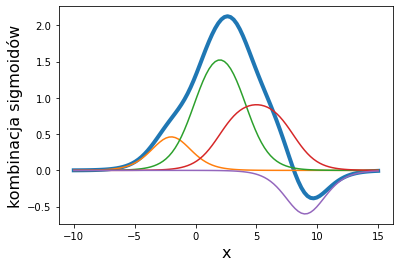

In [80]:
s = np.linspace(-10, 15, 100)

f1 = [sig(z+3)-sig(z+1) for z in s]
f2 = [2*(sig(z-0)-sig(z-4)) for z in s]
f3 = [sig(z-2)-sig(z-8) for z in s]
f4 = [-1.3*(sig(z-8)-sig(z-10)) for z in s]

fs = [sig(z+3)-sig(z+1)+2*(sig(z-0)-sig(z-4))+sig(z-2)-sig(z-8)-1.3*(sig(z-8)-sig(z-10)) 
       for z in s]

plt.xlabel('x',fontsize=16)
plt.ylabel('kombinacja sigmoidów',fontsize=16)

plt.plot(s, fs, linewidth=4)
plt.plot(s, f1)
plt.plot(s, f2)
plt.plot(s, f3)
plt.plot(s, f4);


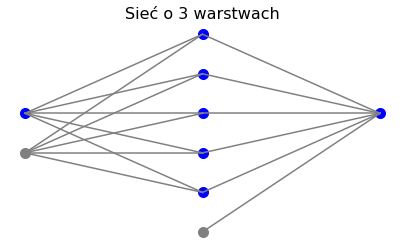

In [81]:
# siec z jedną warstwą pośrednią z kilkoma neuronami
siec=[2,6,2]
plot_net(siec)

In [82]:
def feed_forward_lin(n_war, wagi, x_in):
    """Propagacja sygnału w przód z liniową odpowiedzią w ostatniej warstwie"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    x.update({0: np.array(x_in)}) 
     
    for i in range(1,li_war-1): # pętla po warstwach od inputowej do przedostatniej
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[sig(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy i
                                    # (określony przez sigmoid)
        x.update({i: np.insert(b,0,1)}) 
        
    for i in range(li_war-1,li_war): # ostatnia warstwa
        a=np.dot(x[i-1],wagi[i])  # odpowiedź liniowa
        x.update({i: np.insert(a,0,1)}) 
    return x

In [83]:
def back_prop_lin(dane, odp, p, n_war, wagi, eps):
    """Propagacja wsteczna dla sieci z liniową odpowiedzią w warstwie outputowej"""
 
    li_war=len(n_war) # liczba warstw (licząc wszystkie)

    po=np.insert(dane[p],0,1) # dodanie do punktu danych jedynki na początku (węzeł progowy)

    x=feed_forward_lin(n_war,wagi,po) # propagacja sygnału do przodu
   
    n=n_war[li_war-1]-1  # liczba neuronów w warstwie outputowej 
    
    k=len(n_war)-2       # liczba warstw pośrednich
                         # wszystkich warstw jest k+2, są numerowane jako 0,1,2,...,k+1
                         # tj. 0 - inputowa, k+1 - outputowa, pozostałe pośrednie

    D={}                 # słownik dla wielkości D z wyprowadzenia
    
    D.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(x[k+1][gam]-odp[p][gam-1])*
        (np.dot(x[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]}) 
                         # nie ma pochodnej sigmoidu  

    wagi[k+1]-=eps*np.outer(x[k],D[k+1]) # uaktualnienie wag prowadzącch do warstwy outputowej

    # pętla po pozostałych warstwach po j = k, k-1, ..., 1
    for j in reversed(range(1,k+1)):            # pętla w odwrotnej kolejności
        u=np.delete(np.dot(wagi[j+1],D[j+1]),0) # implementacja wzoru z wyprowadzenia
        v=np.dot(x[j-1],wagi[j])        
        D.update({j: [u[i]*dsig(v[i]) for i in range(len(u))]}) # dopisanie D[j] do słownika
        wagi[j]-=eps*np.outer(x[j-1],D[j])      # uaktualnienie wag

In [84]:
wagi=ran_w_s(siec,2) # początkowe losowe wagi

# Jeśli się wywraca, puszczać do skutku
for k in range(300): 
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.01)

In [85]:
for k in range(300):  # puścić kilka razy
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.05)

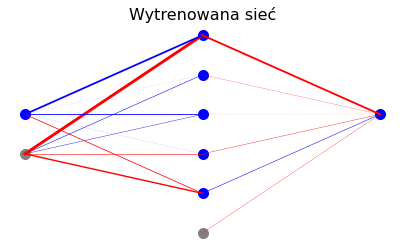

In [86]:
plot_net_w_s(siec,wagi,.3)

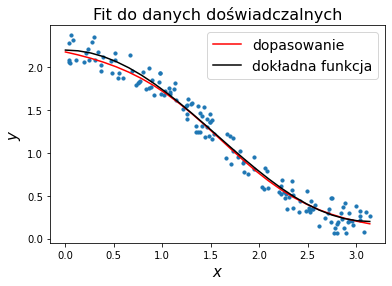

In [87]:
res=[feed_forward_lin(siec, wagi, [1,x])[2][1] for x in coo]

plt.figure(figsize=(6,4))

plt.title("Fit do danych doświadczalnych",fontsize=16) 
plt.scatter(da_f,od_f,s=10)


plt.plot(coo,res,c='red',label='dopasowanie')
plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

## Zadanie 5.2

In [205]:
# funkcja dwóch zmiennych
def ft(X,Y):
    return X*Y*np.exp(-X**2-2*Y**2)

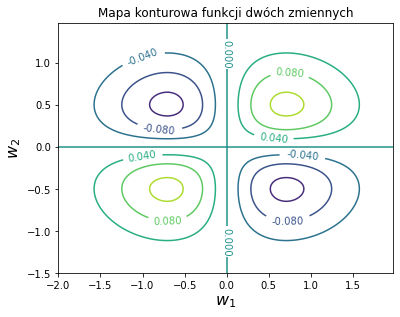

In [206]:
delta = 0.025
x = np.arange(-2, 2, delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
Z = ft(X,Y)

fig, ax = plt.subplots(figsize=(6,6))

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Mapa konturowa funkcji dwóch zmiennych', fontsize=12)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=16)
ax.set_ylabel('$w_2$', fontsize=16);

### Badana funkcja znajduje się w czterech czwartkach wykresu. 

In [207]:
# (?) Ponadto wykresy w $pierwszym$ i $trzecim$ ćwiartkach odpowiadają funkcji    $-(x^2+y^2)$; w $drugim$ i $czwartym$ ćwiartkach odpowiadają funkcji $x^2+y^2$

In [208]:
#Rozważmy wykres funkcji znajdującej się w pierwszym ćwiartku

#delta = 0.025
#x = np.arange(0, 2, delta)
#y = np.arange(0, 1.5, delta)
#X, Y = np.meshgrid(x, y)
#Z = ft(X,Y)

#fig, ax = plt.subplots(figsize=(6,6))

#CS = ax.contour(X, Y, Z)
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Mapa konturowa funkcji dwóch zmiennych', fontsize=12)
#ax.set_aspect(aspect=1)
#ax.set_xlabel('$w_1$', fontsize=16)
#ax.set_ylabel('$w_2$', fontsize=16);

In [209]:
upx=np.pi                                 # zakres współrżednej = (0,pi)
def dane():
    X = upx*random.random()               # współrzędna X
    Y = upx*random.random()               # współrzędna Y
    Z = ft(X, Y)+0.2*(random.random()-0.5)   # wartość funkcji, Z=ft(X,Y)+szum
    return [X, Y, Z]

In [210]:
dane() # losowe współrzędny X, Y  i zaszumione Z

[2.022699436274857, 0.810596999938835, 0.04760073395558624]

In [211]:
tab=np.array([dane() for i in range(50)]) # 50 punktów
da_fXY=np.delete(tab,2,1)                   # dane inputowe, czyli X,Y
da_fX = np.delete(da_fXY,1,1)  # dane inputowe, czyli X
da_fY = np.delete(da_fXY,0,1)  # dane inputowe, czyli Y
od_f=np.delete(np.delete(tab,0,1),0,1)                   # prawdziwy output, czyli Z

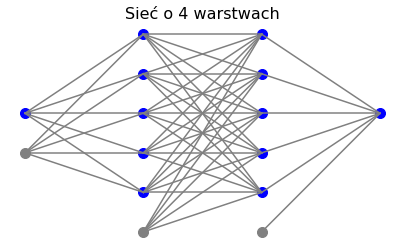

In [213]:
# siec z jedną warstwą pośrednią z kilkoma neuronami
siec=[2,6,6,2]
plot_net(siec)

In [214]:
def feed_forward_lin(n_war, wagi, X_in, Y_in):
    """Propagacja sygnału w przód z liniową odpowiedzią w ostatniej warstwie"""
    li_war=len(n_war)
    
    X={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    X.update({0: np.array(X_in)}) 
    
    Y={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    Y.update({0: np.array(Y_in)}) 
     
    for i in range(1,li_war-1): # pętla po warstwach od inputowej do przedostatniej
        a=np.dot(X[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[sig(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy i
                                    # (określony przez sigmoid)
        X.update({i: np.insert(b,0,1)}) 
        
    for i in range(1,li_war-1): # pętla po warstwach od inputowej do przedostatniej
        c=np.dot(Y[i-1],wagi[i]) # sygnał docierający do warstwy i
        d=[sig(c[q]) for q in range(len(c))] # sygnał wychodzacy z warstwy i
                                    # (określony przez sigmoid)
        Y.update({i: np.insert(d,0,1)})
        
    for i in range(li_war-1,li_war): # ostatnia warstwa
        a=np.dot(x[i-1],wagi[i])  # odpowiedź liniowa
        X.update({i: np.insert(a,0,1)}) 
        
    for i in range(li_war-1,li_war): # ostatnia warstwa
        a=np.dot(x[i-1],wagi[i])  # odpowiedź liniowa
        Y.update({i: np.insert(c,0,1)})
        
    return X, Y

In [215]:
def back_prop_lin(dane, odp, p, n_war, wagi, eps):
    """Propagacja wsteczna dla sieci z liniową odpowiedzią w warstwie outputowej"""
 
    li_war=len(n_war) # liczba warstw (licząc wszystkie)

    po=np.insert(dane[p],0,1) # dodanie do punktu danych jedynki na początku (węzeł progowy)

    X, Y =feed_forward_lin(n_war,wagi,po, po) # propagacja sygnału do przodu
   
    n=n_war[li_war-1]-1  # liczba neuronów w warstwie outputowej 
    
    k=len(n_war)-2       # liczba warstw pośrednich
                         # wszystkich warstw jest k+2, są numerowane jako 0,1,2,...,k+1
                         # tj. 0 - inputowa, k+1 - outputowa, pozostałe pośrednie

    D={}                 # słownik dla wielkości D z wyprowadzenia
    
    D.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(X[k+1][gam]-odp[p][gam-1])*
        (np.dot(X[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]}) 
                         # nie ma pochodnej sigmoidu  
        
    E={}
    E.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(Y[k+1][gam]-odp[p][gam-1])*
        (np.dot(Y[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]}) 

    wagi[k+1]-=eps*np.outer(X[k],D[k+1]) # uaktualnienie wag prowadzącch do warstwy outputowej

    # pętla po pozostałych warstwach po j = k, k-1, ..., 1
    for j in reversed(range(1,k+1)):            # pętla w odwrotnej kolejności
        u=np.delete(np.dot(wagi[j+1],D[j+1]),0) # implementacja wzoru z wyprowadzenia
        v=np.dot(x[j-1],wagi[j])        
        D.update({j: [u[i]*dsig(v[i]) for i in range(len(u))]}) # dopisanie D[j] do słownika
        wagi[j]-=eps*np.outer(X[j-1],D[j])      # uaktualnienie wag

# To zadanie spowodowało trudności. I do tej pory nie zostało to omówione do końca. Z tego powodu postanowiłem zostawić to w taki sposób, aby rozwiązać to zadanie w wolnym czasie.

In [220]:
wagi=ran_w_s(siec,2) # początkowe losowe wagi

# Jeśli się wywraca, puszczać do skutku
for k in range(300): 
    for p in range(len(od_f)):
        back_prop_lin(od_f,od_f,p,siec,wagi,.01)

ValueError: operands could not be broadcast together with shapes (6,5) (6,25) 

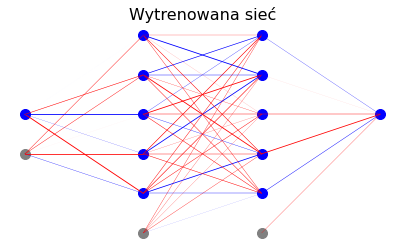

In [221]:
plot_net_w_s(siec,wagi,.3)

In [222]:
delta = 0.025
  
X = [feed_forward_lin(siec, wagi, [1,x])[2][1] for x in coo]
Y = [feed_forward_lin(siec, wagi, [1,x])[2][1] for y in coo]
#da_fX, da_fY = np.meshgrid(x, y)
Z = ft(X,Y)

fig, ax = plt.subplots(figsize=(6,6))

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Mapa konturowa funkcji dwóch zmiennych', fontsize=12)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=16)
ax.set_ylabel('$w_2$', fontsize=16);

TypeError: feed_forward_lin() missing 1 required positional argument: 'Y_in'

# Wykład 7/8

# Uczenie nienadzorowane. ZADANIA

1. Weź metrykę miejską zamiast euklidesowej,

$d(\vec{x},\vec{y})=|x_1-y_1|+|x_2 - y_2|$ dla punktów $\vec{x}$ i $\vec{y}$,

i powtórz konstrukcję obszarów Woronoja dla tej metryki.
Powtórz pozostałe części wykładu z tą metryką. 

2. Powtórz różne warianty algorytmów klasyfikacji dla większej liczby kategorii w próbce danych. Przydyskutuj działanie algorytmów (dla metryki euklidesowej lub miejskiej, do wyboru).

In [34]:
def pA():
    return [random.uniform(.75, .95),random.uniform(.7, .9)] 

def pB():
    return [random.uniform(.4, .6),random.uniform(.6, .75)] 

def pC():
    return [random.uniform(.1, .3),random.uniform(.4, .5)] 

def pD():
    return [random.uniform(.7, .9),random.uniform(0, .2)] 

In [35]:
samA=np.array([pA() for _ in range(10)])
samB=np.array([pB() for _ in range(7)])
samC=np.array([pC() for _ in range(9)])
samD=np.array([pD() for _ in range(11)])

In [36]:
col=['red','blue','green','magenta']

In [37]:
samA[:,1]

array([0.86980863, 0.7134673 , 0.84833872, 0.7605278 , 0.75079756,
       0.75191217, 0.86590247, 0.81132602, 0.71121197, 0.88279218])

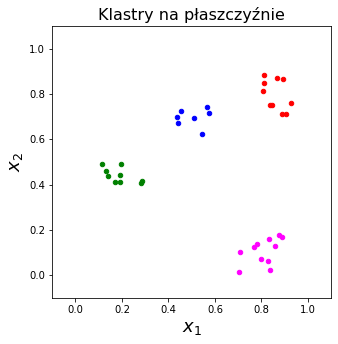

In [38]:
plt.figure(figsize=(5,5))
plt.title("Klastry na płaszczyźnie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(samA[:,0],samA[:,1],c=col[0], s=20)
plt.scatter(samB[:,0],samB[:,1],c=col[1], s=20)
plt.scatter(samC[:,0],samC[:,1],c=col[2], s=20)
plt.scatter(samD[:,0],samD[:,1],c=col[3], s=20)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [39]:
rA=[st.mean(samA[:,0]),st.mean(samA[:,1])]
rB=[st.mean(samB[:,0]),st.mean(samB[:,1])]
rC=[st.mean(samC[:,0]),st.mean(samC[:,1])]
rD=[st.mean(samD[:,0]),st.mean(samD[:,1])]

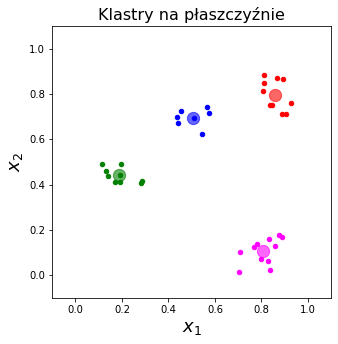

In [40]:
plt.figure(figsize=(5,5))
plt.title("Klastry na płaszczyźnie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(samA[:,0],samA[:,1],c=col[0], s=20)
plt.scatter(samB[:,0],samB[:,1],c=col[1], s=20)
plt.scatter(samC[:,0],samC[:,1],c=col[2], s=20)
plt.scatter(samD[:,0],samD[:,1],c=col[3], s=20)

plt.scatter(rA[0],rA[1],c=col[0], s=150, alpha=0.6)
plt.scatter(rB[0],rB[1],c=col[1], s=150, alpha=0.6)
plt.scatter(rC[0],rC[1],c=col[2], s=150, alpha=0.6)
plt.scatter(rD[0],rD[1],c=col[3], s=150, alpha=0.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

## Obszary Woronoja

# Zadanie 6.1

In [41]:
def mm(p1,p2): # Metryka miejska
    return fabs(p1[0]-p2[0])+fabs(p1[1]-p2[1])

In [42]:
mm([5,1],[4,8])

8.0

In [43]:
def col_char(p):
    dist=[mm(p,rA),mm(p,rB),mm(p,rC),mm(p,rD)]
    ind_min = np.argmin(dist) # wskaźnik minimum listy odległości
    return col[ind_min]

In [44]:
np.linspace(0,1,70)

array([0.        , 0.01449275, 0.02898551, 0.04347826, 0.05797101,
       0.07246377, 0.08695652, 0.10144928, 0.11594203, 0.13043478,
       0.14492754, 0.15942029, 0.17391304, 0.1884058 , 0.20289855,
       0.2173913 , 0.23188406, 0.24637681, 0.26086957, 0.27536232,
       0.28985507, 0.30434783, 0.31884058, 0.33333333, 0.34782609,
       0.36231884, 0.37681159, 0.39130435, 0.4057971 , 0.42028986,
       0.43478261, 0.44927536, 0.46376812, 0.47826087, 0.49275362,
       0.50724638, 0.52173913, 0.53623188, 0.55072464, 0.56521739,
       0.57971014, 0.5942029 , 0.60869565, 0.62318841, 0.63768116,
       0.65217391, 0.66666667, 0.68115942, 0.69565217, 0.71014493,
       0.72463768, 0.73913043, 0.75362319, 0.76811594, 0.7826087 ,
       0.79710145, 0.8115942 , 0.82608696, 0.84057971, 0.85507246,
       0.86956522, 0.88405797, 0.89855072, 0.91304348, 0.92753623,
       0.94202899, 0.95652174, 0.97101449, 0.98550725, 1.        ])

In [45]:
# na przykład
col_char([.2,.2])

'green'

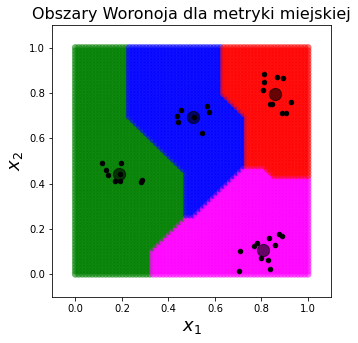

In [46]:
plt.figure(figsize=(5,5))
plt.title("Obszary Woronoja dla metryki miejskiej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for x1 in np.linspace(0,1,70):
    for x2 in np.linspace(0,1,70):
        plt.scatter(x1,x2,c=col_char([x1,x2]), s=50, alpha=0.6, edgecolors='none')

plt.scatter(samA[:,0],samA[:,1],c='black', s=20)
plt.scatter(samB[:,0],samB[:,1],c='black', s=20)
plt.scatter(samC[:,0],samC[:,1],c='black', s=20)
plt.scatter(samD[:,0],samD[:,1],c='black', s=20)

plt.scatter(rA[0],rA[1],c='black', s=150, alpha=.6)
plt.scatter(rB[0],rB[1],c='black', s=150, alpha=.6)
plt.scatter(rC[0],rC[1],c='black', s=150, alpha=.6)
plt.scatter(rD[0],rD[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Sformułowanie problemu podziału na klastry

In [47]:
alls=np.concatenate((samA, samB, samC, samD))
np.random.shuffle(alls)

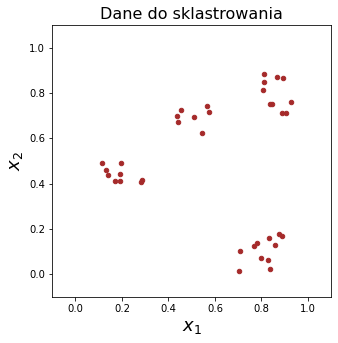

In [53]:
plt.figure(figsize=(5,5))
plt.title("Dane do sklastrowania",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [54]:
np.random.shuffle(alls)
alls

array([[0.11395521, 0.49107613],
       [0.7797723 , 0.13617434],
       [0.18946535, 0.41193993],
       [0.88921289, 0.71121197],
       [0.92592654, 0.7605278 ],
       [0.83633173, 0.02350678],
       [0.13136897, 0.46146991],
       [0.70398062, 0.01194679],
       [0.14133938, 0.43582326],
       [0.90373077, 0.7134673 ],
       [0.8683265 , 0.86980863],
       [0.45342558, 0.72270191],
       [0.8890901 , 0.16632711],
       [0.70683228, 0.10030646],
       [0.89458199, 0.86590247],
       [0.87658971, 0.17650865],
       [0.85748338, 0.12700367],
       [0.83220941, 0.15777846],
       [0.438023  , 0.69746366],
       [0.56541749, 0.74302921],
       [0.19722264, 0.49098628],
       [0.28586244, 0.41434689],
       [0.28086864, 0.40756081],
       [0.54396366, 0.62415084],
       [0.84717177, 0.75079756],
       [0.83816626, 0.75191217],
       [0.79753978, 0.06995854],
       [0.80599654, 0.81132602],
       [0.18995437, 0.44291539],
       [0.57379647, 0.7143157 ],
       [0.

In [55]:
R=np.array([random.random(),random.random()])
print("Początkowy punkt reprezentatywny:")
print(R)
print("kolejne rundy")

Początkowy punkt reprezentatywny:
[0.40693685 0.80575906]
kolejne rundy


In [56]:
eps=.5

for _ in range(50):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        R+=eps*(alls[i]-R)
    print(R)   

[0.78258254 0.34254212]
[0.57979246 0.57094863]
[0.66302359 0.55628997]
[0.46209722 0.52541097]
[0.57683872 0.54561531]
[0.59865612 0.32218211]
[0.63898148 0.42035039]
[0.57016118 0.45610343]
[0.51429455 0.47551117]
[0.60071666 0.56097056]
[0.61976165 0.46525938]
[0.65149569 0.45991672]
[0.65108021 0.48823262]
[0.59000857 0.48715064]
[0.62683772 0.48377615]
[0.62160385 0.48886396]
[0.62413082 0.48980591]
[0.62261404 0.47951069]
[0.61120947 0.47861037]
[0.61788323 0.47830539]
[0.6114023  0.48833191]
[0.60890451 0.48802396]
[0.61010867 0.48807266]
[0.6113137  0.48697415]
[0.61092036 0.4874982 ]
[0.61030541 0.48735899]
[0.61103412 0.48594   ]
[0.61083983 0.48555688]
[0.61127803 0.48511403]
[0.61169102 0.48583255]
[0.61198482 0.48582136]
[0.61235894 0.48577857]
[0.61255611 0.48578393]
[0.612677   0.48575935]
[0.61273337 0.48577305]
[0.61275084 0.48575701]
[0.61280636 0.48579252]
[0.61281982 0.48577125]
[0.61286908 0.48576486]
[0.61288584 0.48575629]
[0.61290636 0.48573727]
[0.61292403 0.48

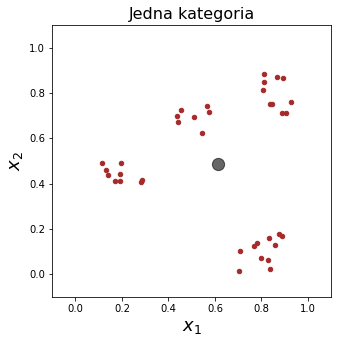

In [57]:
plt.figure(figsize=(5,5))
plt.title("Jedna kategoria",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R[0],R[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [58]:
R_mean=[st.mean(alls[:,0]),st.mean(alls[:,1])]
R_mean

[0.6135497174588851, 0.4854308548886126]

In [59]:
R1=np.array([random.random(),random.random()])
R2=np.array([random.random(),random.random()])

print("Początkowe punkty reprezentatywne:")
print(R1, R2)
print("kolejne rundy")

Początkowe punkty reprezentatywne:
[0.83177755 0.15247377] [0.26866298 0.69100958]
kolejne rundy


In [60]:
eps=.5

for _ in range(50):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        p=alls[i]
        dist=[mm(p,R1),mm(p,R2)] # kwadraty odległości
        ind_min = np.argmin(dist)
        if ind_min==0:
            R1+=eps*(p-R1)
        else:
            R2+=eps*(p-R2)            
    print(R1, R2) 

[0.7967823  0.17295675] [0.1967234 0.465019 ]
[0.8263903  0.25314312] [0.26110581 0.53927708]
[0.86241693 0.35057848] [0.29117882 0.56624473]
[0.83636823 0.67247879] [0.31581958 0.58397072]
[0.84159225 0.48315821] [0.2620789  0.50726922]
[0.83003308 0.41056781] [0.34007968 0.54924355]
[0.83362169 0.47006623] [0.34372903 0.55642653]
[0.8495577  0.48262437] [0.34210316 0.55773769]
[0.81848485 0.36408308] [0.32808234 0.55755328]
[0.83348151 0.44853595] [0.32838411 0.55484758]
[0.83478175 0.48502992] [0.34035679 0.56844898]
[0.82900286 0.44442448] [0.33802445 0.56142023]
[0.83521944 0.42566035] [0.32685821 0.55075932]
[0.83587782 0.42640684] [0.32767189 0.54813452]
[0.83412304 0.42091677] [0.32222068 0.54960411]
[0.83572    0.42522928] [0.32270536 0.54834156]
[0.83389287 0.42778738] [0.32683552 0.55229404]
[0.83324362 0.43352763] [0.32635356 0.55205994]
[0.83317593 0.44054016] [0.325444   0.55127806]
[0.83327286 0.43449404] [0.32612283 0.55196099]
[0.8322075  0.43381036] [0.32482385 0.5508

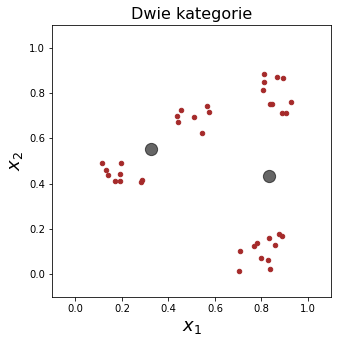

In [61]:
plt.figure(figsize=(5,5))
plt.title("Dwie kategorie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R1[0],R1[1],c='black', s=150, alpha=.6)
plt.scatter(R2[0],R2[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Początkowe punkty reprezentatywne:
[0.259 0.309] [0.804 0.312] [0.196 0.476] [0.292 0.747]
kolejne rundy
[0.275 0.377] [0.787 0.082] [0.175 0.436] [0.636 0.726]
[0.48  0.645] [0.785 0.096] [0.172 0.446] [0.812 0.799]
[0.496 0.687] [0.826 0.1  ] [0.214 0.433] [0.851 0.798]
[0.514 0.704] [0.779 0.089] [0.167 0.444] [0.852 0.811]
[0.511 0.689] [0.813 0.104] [0.187 0.44 ] [0.865 0.821]
[0.499 0.694] [0.798 0.103] [0.186 0.441] [0.855 0.805]
[0.514 0.695] [0.816 0.109] [0.19  0.438] [0.863 0.8  ]
[0.511 0.693] [0.81  0.111] [0.195 0.442] [0.852 0.802]
[0.506 0.691] [0.807 0.102] [0.186 0.441] [0.859 0.798]
[0.506 0.697] [0.808 0.107] [0.186 0.442] [0.861 0.794]
[0.505 0.698] [0.807 0.105] [0.186 0.443] [0.859 0.797]
[0.505 0.697] [0.804 0.103] [0.185 0.441] [0.86  0.797]
[0.505 0.696] [0.805 0.102] [0.184 0.442] [0.861 0.793]
[0.505 0.696] [0.806 0.105] [0.186 0.441] [0.859 0.796]
[0.505 0.695] [0.807 0.106] [0.187 0.441] [0.86  0.795]
[0.505 0.695] [0.807 0.104] [0.186 0.441] [0.859 0.796]

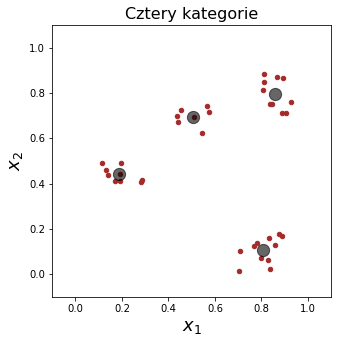

In [62]:
R1=np.array([random.random(),random.random()])
R2=np.array([random.random(),random.random()])
R3=np.array([random.random(),random.random()])
R4=np.array([random.random(),random.random()])


print("Początkowe punkty reprezentatywne:")
print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3))   
print("kolejne rundy")

eps=.5

for _ in range(20):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        p=alls[i]
        dist=[mm(p,R1),mm(p,R2),mm(p,R3),mm(p,R4)]
        ind_min = np.argmin(dist)
        if ind_min==0:
            R1+=eps*(p-R1)
        elif ind_min==1:
            R2+=eps*(p-R2)  
        elif ind_min==2:
            R3+=eps*(p-R3)  
        else:
            R4+=eps*(p-R4)             
    print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3))   

plt.figure(figsize=(5,5))
plt.title("Cztery kategorie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R1[0],R1[1],c='black', s=150, alpha=.6)
plt.scatter(R2[0],R2[1],c='black', s=150, alpha=.6)
plt.scatter(R3[0],R3[1],c='black', s=150, alpha=.6)
plt.scatter(R4[0],R4[1],c='black', s=150, alpha=.6)


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Początkowe punkty reprezentatywne:
[0.799 0.163] [0.509 0.547] [0.885 0.867] [0.808 0.76 ] [0.548 0.483]
kolejne rundy
[0.831 0.146] [0.48  0.696] [0.843 0.853] [0.881 0.726] [0.174 0.448]
[0.786 0.083] [0.533 0.685] [0.849 0.851] [0.894 0.741] [0.193 0.439]
[0.821 0.093] [0.483 0.693] [0.848 0.853] [0.878 0.736] [0.184 0.442]
[0.808 0.091] [0.479 0.701] [0.839 0.858] [0.88  0.735] [0.203 0.441]
[0.796 0.11 ] [0.504 0.694] [0.831 0.853] [0.878 0.737] [0.174 0.445]
[0.808 0.101] [0.505 0.694] [0.839 0.856] [0.884 0.739] [0.178 0.445]
[0.792 0.085] [0.502 0.691] [0.837 0.856] [0.886 0.739] [0.177 0.446]
[0.796 0.09 ] [0.498 0.691] [0.836 0.854] [0.882 0.737] [0.193 0.443]
[0.794 0.096] [0.498 0.692] [0.839 0.855] [0.883 0.737] [0.199 0.437]
[0.798 0.107] [0.504 0.693] [0.839 0.855] [0.881 0.737] [0.193 0.437]
[0.802 0.099] [0.505 0.697] [0.838 0.854] [0.881 0.738] [0.193 0.438]
[0.804 0.105] [0.506 0.696] [0.838 0.855] [0.881 0.738] [0.193 0.438]
[0.807 0.104] [0.504 0.695] [0.838 0.855]

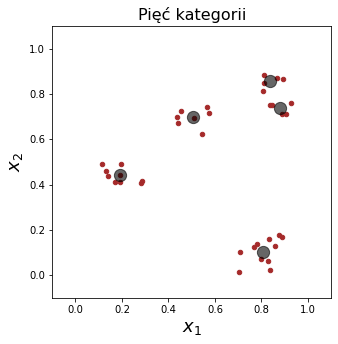

In [63]:
R1=np.array([random.random(),random.random()])
R2=np.array([random.random(),random.random()])
R3=np.array([random.random(),random.random()])
R4=np.array([random.random(),random.random()])
R5=np.array([random.random(),random.random()])

print("Początkowe punkty reprezentatywne:")
print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3), np.round(R5,3))   
print("kolejne rundy")

eps=.5

for _ in range(20):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        p=alls[i]
        dist=[mm(p,R1),mm(p,R2),mm(p,R3),mm(p,R4),mm(p,R5)]
        ind_min = np.argmin(dist)
        if ind_min==0:
            R1+=eps*(p-R1)
        elif ind_min==1:
            R2+=eps*(p-R2)  
        elif ind_min==2:
            R3+=eps*(p-R3)  
        elif ind_min==3:
            R4+=eps*(p-R4)  
        else:
            R5+=eps*(p-R5)             
    print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3), np.round(R5,3))   

plt.figure(figsize=(5,5))
plt.title("Pięć kategorii",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R1[0],R1[1],c='black', s=150, alpha=.6)
plt.scatter(R2[0],R2[1],c='black', s=150, alpha=.6)
plt.scatter(R3[0],R3[1],c='black', s=150, alpha=.6)
plt.scatter(R4[0],R4[1],c='black', s=150, alpha=.6)
plt.scatter(R5[0],R5[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Strategia rozszczepiania

In [64]:
def rp(): # liczba losowa z przedziału [-0.05,0.05]
    return np.array([random.random()-0/5,random.random()-0.5])/10

In [65]:
R1=R_mean+rp()
R2=R_mean+rp()
R3=R_mean+rp()
R4=R_mean+rp()


print("Początkowe punkty reprezentatywne:")
print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3))   
print("kolejne rundy")

Początkowe punkty reprezentatywne:
[0.674 0.471] [0.673 0.518] [0.663 0.484] [0.685 0.487]
kolejne rundy


In [66]:
eps=.7

for _ in range(10):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        p=alls[i]
        dist=[mm(p,R1),mm(p,R2),mm(p,R3),mm(p,R4)]
        ind_min = np.argmin(dist)
        if ind_min==0:
            R1+=eps*(p-R1)
        elif ind_min==1:
            R2+=eps*(p-R2)  
        elif ind_min==2:
            R3+=eps*(p-R3)  
        else:
            R4+=eps*(p-R4)             
    print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3)) 

[0.832 0.129] [0.836 0.828] [0.153 0.468] [0.465 0.691]
[0.767 0.081] [0.853 0.828] [0.183 0.436] [0.543 0.669]
[0.812 0.106] [0.849 0.846] [0.156 0.438] [0.492 0.7  ]
[0.812 0.111] [0.856 0.803] [0.201 0.456] [0.518 0.713]
[0.794 0.094] [0.862 0.789] [0.185 0.456] [0.483 0.696]
[0.843 0.124] [0.871 0.803] [0.189 0.444] [0.507 0.706]
[0.808 0.1  ] [0.856 0.793] [0.179 0.436] [0.495 0.691]
[0.797 0.097] [0.858 0.801] [0.188 0.442] [0.508 0.689]
[0.812 0.103] [0.863 0.796] [0.195 0.44 ] [0.51  0.698]
[0.812 0.109] [0.865 0.796] [0.183 0.441] [0.508 0.701]


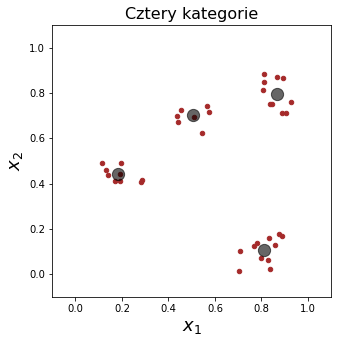

In [67]:
plt.figure(figsize=(5,5))
plt.title("Cztery kategorie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R1[0],R1[1],c='black', s=150, alpha=.6)
plt.scatter(R2[0],R2[1],c='black', s=150, alpha=.6)
plt.scatter(R3[0],R3[1],c='black', s=150, alpha=.6)
plt.scatter(R4[0],R4[1],c='black', s=150, alpha=.6)


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Skala klastrowania

liczba punktów reprezentatywnych:  14


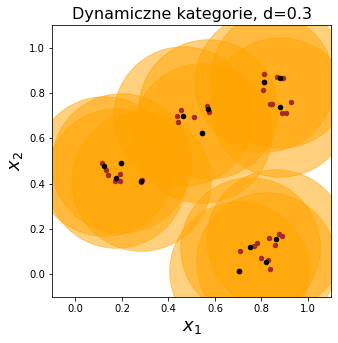

In [68]:
# NIE MA na razie żadnego punktu reprezentatywnego

d=0.3 # skala klastra
eps=.5 

for r in range(25): # rundy
    eps=0.85*eps
    np.random.shuffle(alls) 
    if r==0:                 # przy początkowej rundzie
        R=np.array([alls[0]])
#        print(R)       
    for i in range(len(alls)): # po punktach próbki
        p=alls[i]
        dist=[mm(p,R[k]) for k in range(len(R))] # kwadraty odległości od obecnych punktów 
                                                   # reprezentatywnych
#        print(dist)
        ind_min = np.argmin(dist)
        if dist[ind_min] > d*d:     # jeśli odległość > d
#            print("-> nowy punkt reprezentatywny")
            R=np.append(R, [p], axis=0)
        else:   
            R[ind_min]+=eps*(p-R[ind_min])

print("liczba punktów reprezentatywnych: ",len(R))
 
plt.figure(figsize=(5,5))
plt.title("Dynamiczne kategorie, d="+str(d),fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='orange', s=(465*d)**2, alpha=.5)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='black', s=20)


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);    

Zmodyfikowany algorytm:

liczba punktów reprezentatywnych:  37


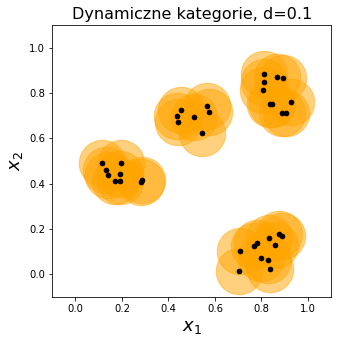

In [69]:
d=0.1
eps=.05
delta=.001

for r in range(25):
    eps=0.85*eps
    np.random.shuffle(alls)
    if r==0:
        R=np.array([alls[0]])
#        print(R)       
    for i in range(len(alls)):
        p=alls[i]
        dist=[mm(p,R[k]) for k in range(len(R))]
#        print(dist)
        ind_min = np.argmin(dist)
        if dist[ind_min] > d*d:
#            print("-> nowy punkt reprezentatywny")
            R=np.append(R, [p], axis=0)
        else:   
            R[ind_min]+=eps*(p-R[ind_min])/np.sqrt(dist[ind_min]+delta*delta)

print("liczba punktów reprezentatywnych: ",len(R))
 
plt.figure(figsize=(5,5))
plt.title("Dynamiczne kategorie, d="+str(d),fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='orange', s=(465*d)**2, alpha=.5)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='black', s=20)


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);    

# Zadanie 6.2

### Klasyfikacja dla 5 kategorii za pomocą metryki euklidesowej.

In [70]:
def pA():
    return [random.uniform(.75, .9),random.uniform(.8, .95)] 

def pB():
    return [random.uniform(.45, .65),random.uniform(.45, .6)] 

def pC():
    return [random.uniform(.05, .2),random.uniform(.65, .85)] 

def pD():
    return [random.uniform(.7, .9),random.uniform(0, .2)] 

def pE():
    return [random.uniform(.15, .3),random.uniform(.1, .25)]  

In [71]:
pE()

[0.19335150818841956, 0.23854817311751395]

In [72]:
samA=np.array([pA() for _ in range(10)])
samB=np.array([pB() for _ in range(7)])
samC=np.array([pC() for _ in range(9)])
samD=np.array([pD() for _ in range(11)])
samE=np.array([pE() for _ in range(12)])

In [73]:
col=['red','blue','green','magenta','orange']

In [74]:
samA[:,1]

array([0.80600083, 0.81591813, 0.82052225, 0.9490956 , 0.89680763,
       0.85180501, 0.88062749, 0.8118053 , 0.90323874, 0.83298552])

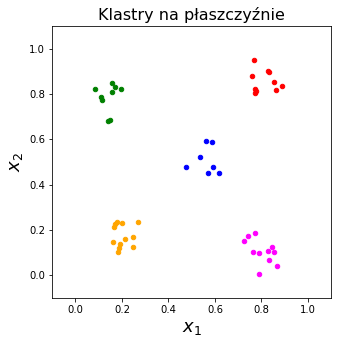

In [75]:
plt.figure(figsize=(5,5))
plt.title("Klastry na płaszczyźnie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(samA[:,0],samA[:,1],c=col[0], s=20)
plt.scatter(samB[:,0],samB[:,1],c=col[1], s=20)
plt.scatter(samC[:,0],samC[:,1],c=col[2], s=20)
plt.scatter(samD[:,0],samD[:,1],c=col[3], s=20)
plt.scatter(samE[:,0],samE[:,1],c=col[4], s=20)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [76]:
rA=[st.mean(samA[:,0]),st.mean(samA[:,1])]
rB=[st.mean(samB[:,0]),st.mean(samB[:,1])]
rC=[st.mean(samC[:,0]),st.mean(samC[:,1])]
rD=[st.mean(samD[:,0]),st.mean(samD[:,1])]
rE=[st.mean(samE[:,0]),st.mean(samE[:,1])]

In [77]:
rE

[0.20111092082929993, 0.1747333543196888]

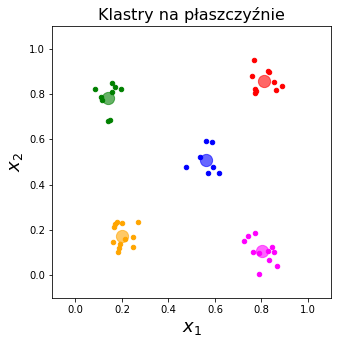

In [78]:
plt.figure(figsize=(5,5))
plt.title("Klastry na płaszczyźnie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(samA[:,0],samA[:,1],c=col[0], s=20)
plt.scatter(samB[:,0],samB[:,1],c=col[1], s=20)
plt.scatter(samC[:,0],samC[:,1],c=col[2], s=20)
plt.scatter(samD[:,0],samD[:,1],c=col[3], s=20)
plt.scatter(samE[:,0],samE[:,1],c=col[4], s=20)

plt.scatter(rA[0],rA[1],c=col[0], s=150, alpha=0.6)
plt.scatter(rB[0],rB[1],c=col[1], s=150, alpha=0.6)
plt.scatter(rC[0],rC[1],c=col[2], s=150, alpha=0.6)
plt.scatter(rD[0],rD[1],c=col[3], s=150, alpha=0.6)
plt.scatter(rE[0],rE[1],c=col[4], s=150, alpha=0.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Obszary Woronoja

In [79]:
def eucl(p1,p2): # kwadrat odległości euklidesowej
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2

In [80]:
def col_char(p):
    dist=[eucl(p,rA),eucl(p,rB),eucl(p,rC),eucl(p,rD),eucl(p,rE)]
    ind_min = np.argmin(dist) # wskaźnik minimum listy odległości
    return col[ind_min]

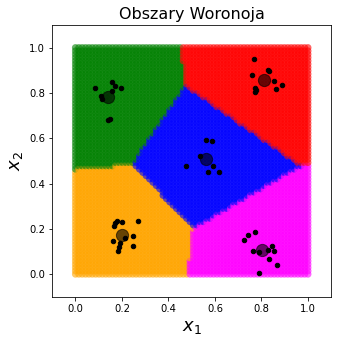

In [81]:
plt.figure(figsize=(5,5))
plt.title("Obszary Woronoja",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for x1 in np.linspace(0,1,70):
    for x2 in np.linspace(0,1,70):
        plt.scatter(x1,x2,c=col_char([x1,x2]), s=50, alpha=0.6, edgecolors='none')

plt.scatter(samA[:,0],samA[:,1],c='black', s=20)
plt.scatter(samB[:,0],samB[:,1],c='black', s=20)
plt.scatter(samC[:,0],samC[:,1],c='black', s=20)
plt.scatter(samD[:,0],samD[:,1],c='black', s=20)
plt.scatter(samE[:,0],samE[:,1],c='black', s=20)

plt.scatter(rA[0],rA[1],c='black', s=150, alpha=.6)
plt.scatter(rB[0],rB[1],c='black', s=150, alpha=.6)
plt.scatter(rC[0],rC[1],c='black', s=150, alpha=.6)
plt.scatter(rD[0],rD[1],c='black', s=150, alpha=.6)
plt.scatter(rE[0],rE[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [82]:
alls=np.concatenate((samA, samB, samC, samD, samE))
np.random.shuffle(alls)

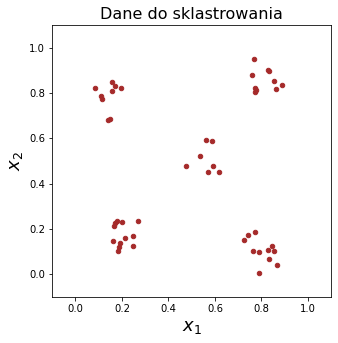

In [83]:
plt.figure(figsize=(5,5))
plt.title("Dane do sklastrowania",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [84]:
np.random.shuffle(alls)

In [85]:
R=np.array([random.random(),random.random()])
print("Początkowy punkt reprezentatywny:")
print(R)
print("kolejne rundy")

Początkowy punkt reprezentatywny:
[0.32699688 0.58997488]
kolejne rundy


In [86]:
eps=.5

for _ in range(50):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        R+=eps*(alls[i]-R)
    print(R)   

[0.38708723 0.51412179]
[0.45652105 0.26811023]
[0.47095359 0.39944703]
[0.6047739 0.4087614]
[0.52404586 0.3578741 ]
[0.55168383 0.42601345]
[0.39628056 0.4722504 ]
[0.41048399 0.48039436]
[0.52645276 0.33547493]
[0.4093869  0.50335345]
[0.43147567 0.37297736]
[0.46928069 0.4442889 ]
[0.49934944 0.45496324]
[0.4894636  0.42971625]
[0.4901166  0.45323843]
[0.49167066 0.44878101]
[0.47039833 0.46435823]
[0.49055537 0.47868041]
[0.51106352 0.46781993]
[0.50919887 0.45416723]
[0.4944674  0.45963206]
[0.50246611 0.45673297]
[0.49521802 0.45846071]
[0.49721969 0.45745567]
[0.50104388 0.45914021]
[0.50047966 0.45959014]
[0.50180738 0.46000778]
[0.5004418  0.45940204]
[0.50099236 0.45868551]
[0.50169406 0.45831052]
[0.50165749 0.45776282]
[0.50147858 0.45782716]
[0.50131859 0.45780897]
[0.501153   0.45789359]
[0.50103573 0.45785441]
[0.50108464 0.45787162]
[0.50099072 0.45794113]
[0.50102654 0.45798405]
[0.50099222 0.45796022]
[0.50100089 0.45794799]
[0.50101253 0.45794291]
[0.50101389 0.4579

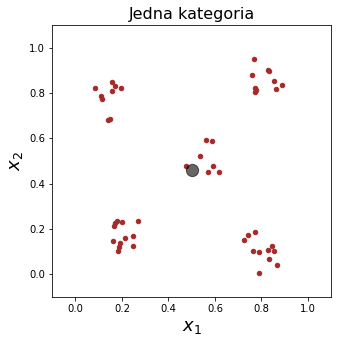

In [87]:
plt.figure(figsize=(5,5))
plt.title("Jedna kategoria",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R[0],R[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

In [88]:
R_mean=[st.mean(alls[:,0]),st.mean(alls[:,1])]
R_mean

[0.501311761042021, 0.45785032990695884]

In [89]:
R1=np.array([random.random(),random.random()])
R2=np.array([random.random(),random.random()])

print("Początkowe punkty reprezentatywne:")
print(R1, R2)
print("kolejne rundy")

Początkowe punkty reprezentatywne:
[0.48520898 0.1596759 ] [0.07777883 0.12982208]
kolejne rundy


In [90]:
eps=.5

for _ in range(50):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        p=alls[i]
        dist=[eucl(p,R1),eucl(p,R2)] # kwadraty odległości
        ind_min = np.argmin(dist)
        if ind_min==0:
            R1+=eps*(p-R1)
        else:
            R2+=eps*(p-R2)            
    print(R1, R2)  

[0.65172198 0.775047  ] [0.37386452 0.18803272]
[0.22397849 0.82722503] [0.25676146 0.15400396]
[0.42758696 0.72929122] [0.34512364 0.21101304]
[0.58681854 0.82895433] [0.38336031 0.21090001]
[0.57928335 0.78297001] [0.45939867 0.13468981]
[0.38674637 0.76894911] [0.48219687 0.17151094]
[0.39715942 0.79265443] [0.49141812 0.2043806 ]
[0.48311441 0.78205252] [0.55575077 0.18868737]
[0.52932311 0.78579867] [0.45522033 0.18101658]
[0.53520939 0.76148043] [0.48604863 0.16767907]
[0.51978801 0.75715052] [0.5134516  0.15673405]
[0.54722215 0.75854587] [0.52843058 0.14333735]
[0.50138141 0.7594656 ] [0.52559017 0.15104158]
[0.50472619 0.75588334] [0.52813072 0.16667862]
[0.50077241 0.76684433] [0.49675526 0.1625322 ]
[0.50034575 0.76098019] [0.51426575 0.15835659]
[0.49013858 0.76253927] [0.50852221 0.15930669]
[0.50126874 0.76048669] [0.49891416 0.16785875]
[0.49973842 0.76088797] [0.49967691 0.16527925]
[0.50420112 0.76098499] [0.49701451 0.16705991]
[0.50248403 0.7598057 ] [0.49481197 0.16

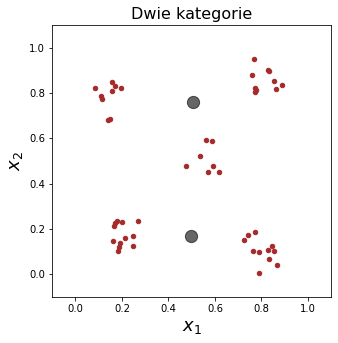

In [91]:
plt.figure(figsize=(5,5))
plt.title("Dwie kategorie",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R1[0],R1[1],c='black', s=150, alpha=.6)
plt.scatter(R2[0],R2[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Początkowe punkty reprezentatywne:
[0.445 0.365] [0.775 0.788] [0.056 0.879] [0.385 0.334] [0.161 0.215]
kolejne rundy
[0.822 0.069] [0.8   0.862] [0.142 0.75 ] [0.57  0.493] [0.197 0.156]
[0.817 0.116] [0.813 0.875] [0.148 0.736] [0.562 0.52 ] [0.19  0.194]
[0.79  0.116] [0.822 0.835] [0.146 0.782] [0.561 0.49 ] [0.193 0.187]
[0.815 0.11 ] [0.824 0.873] [0.132 0.8  ] [0.574 0.487] [0.201 0.17 ]
[0.796 0.117] [0.815 0.859] [0.143 0.803] [0.572 0.521] [0.194 0.166]
[0.814 0.102] [0.804 0.852] [0.143 0.765] [0.564 0.518] [0.19  0.187]
[0.803 0.108] [0.822 0.852] [0.143 0.78 ] [0.562 0.5  ] [0.209 0.185]
[0.81  0.102] [0.814 0.867] [0.142 0.771] [0.566 0.505] [0.2  0.18]
[0.804 0.101] [0.813 0.853] [0.139 0.783] [0.566 0.507] [0.201 0.177]
[0.804 0.108] [0.814 0.854] [0.14  0.788] [0.561 0.509] [0.202 0.174]
[0.806 0.11 ] [0.811 0.854] [0.142 0.791] [0.564 0.51 ] [0.201 0.176]
[0.804 0.106] [0.811 0.855] [0.142 0.788] [0.563 0.51 ] [0.199 0.172]
[0.803 0.107] [0.813 0.854] [0.142 0.785] [

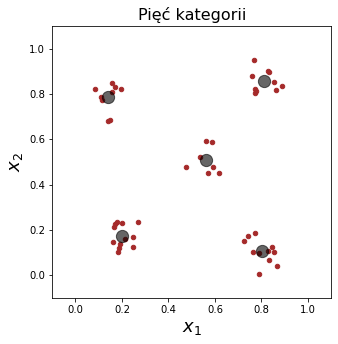

In [92]:
R1=np.array([random.random(),random.random()])
R2=np.array([random.random(),random.random()])
R3=np.array([random.random(),random.random()])
R4=np.array([random.random(),random.random()])
R5=np.array([random.random(),random.random()])

print("Początkowe punkty reprezentatywne:")
print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3), np.round(R5,3))   
print("kolejne rundy")

eps=.5

for _ in range(20):
    eps=0.85*eps
    np.random.shuffle(alls)
    for i in range(len(alls)):
        p=alls[i]
        dist=[eucl(p,R1),eucl(p,R2),eucl(p,R3),eucl(p,R4),eucl(p,R5)]
        ind_min = np.argmin(dist)
        if ind_min==0:
            R1+=eps*(p-R1)
        elif ind_min==1:
            R2+=eps*(p-R2)  
        elif ind_min==2:
            R3+=eps*(p-R3)  
        elif ind_min==3:
            R4+=eps*(p-R4)  
        else:
            R5+=eps*(p-R5)             
    print(np.round(R1,3), np.round(R2,3), np.round(R3,3), np.round(R4,3), np.round(R5,3))   

plt.figure(figsize=(5,5))
plt.title("Pięć kategorii",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
       
plt.scatter(alls[:,0],alls[:,1],c='brown', s=20)

plt.scatter(R1[0],R1[1],c='black', s=150, alpha=.6)
plt.scatter(R2[0],R2[1],c='black', s=150, alpha=.6)
plt.scatter(R3[0],R3[1],c='black', s=150, alpha=.6)
plt.scatter(R4[0],R4[1],c='black', s=150, alpha=.6)
plt.scatter(R5[0],R5[1],c='black', s=150, alpha=.6)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Skala klastrowania

liczba punktów reprezentatywnych:  5


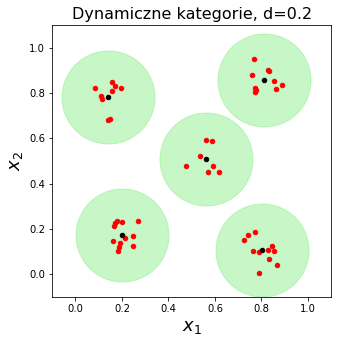

In [93]:
# NIE MA na razie żadnego punktu reprezentatywnego

d=0.2 # skala klastra
eps=.5 

for r in range(25): # rundy
    eps=0.85*eps
    np.random.shuffle(alls) 
    if r==0:                 # przy początkowej rundzie
        R=np.array([alls[0]])
#        print(R)       
    for i in range(len(alls)): # po punktach próbki
        p=alls[i]
        dist=[eucl(p,R[k]) for k in range(len(R))] # kwadraty odległości od obecnych punktów 
                                                   # reprezentatywnych
#        print(dist)
        ind_min = np.argmin(dist)
        if dist[ind_min] > d*d:     # jeśli odległość > d
#            print("-> nowy punkt reprezentatywny")
            R=np.append(R, [p], axis=0)
        else:   
            R[ind_min]+=eps*(p-R[ind_min])

print("liczba punktów reprezentatywnych: ",len(R))
 
plt.figure(figsize=(5,5))
plt.title("Dynamiczne kategorie, d="+str(d),fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='lightgreen', s=(465*d)**2, alpha=.5)
       
plt.scatter(alls[:,0],alls[:,1],c='red', s=20)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='black', s=20)


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);    

### Zmodyfikowany algorytm:

liczba punktów reprezentatywnych:  15


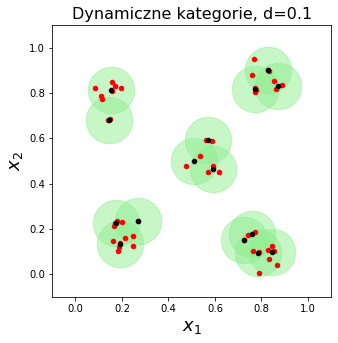

In [94]:
d=0.1
eps=.05
delta=.001

for r in range(25):
    eps=0.85*eps
    np.random.shuffle(alls)
    if r==0:
        R=np.array([alls[0]])
#        print(R)       
    for i in range(len(alls)):
        p=alls[i]
        dist=[eucl(p,R[k]) for k in range(len(R))]
#        print(dist)
        ind_min = np.argmin(dist)
        if dist[ind_min] > d*d:
#            print("-> nowy punkt reprezentatywny")
            R=np.append(R, [p], axis=0)
        else:   
            R[ind_min]+=eps*(p-R[ind_min])/np.sqrt(dist[ind_min]+delta*delta)

print("liczba punktów reprezentatywnych: ",len(R))
 
plt.figure(figsize=(5,5))
plt.title("Dynamiczne kategorie, d="+str(d),fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='lightgreen', s=(465*d)**2, alpha=.5)
       
plt.scatter(alls[:,0],alls[:,1],c='red', s=20)

for k in range(len(R)):
    plt.scatter(R[k][0],R[k][1],c='black', s=20)


plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18); 

# Student:

Stepan Garciu (135 843). Inżynieria danych (2 rok)